# Brazilian E-Commerce Analysis - Student Project

__Business Questions__

__Revenue Analysis__
- 1: What is the average revenue per order, and how does is vary acroos different product categories?
- 2: Does revenue differ accross regions in Brazil?

__Customer Segmentation Analysis__
- 1: Where are customers with a high lifetime value located?
- 2: What is the customer satifsfaction level?
- 3: Do customers who leave a higher review show higher loyalty?

__Efficiency Analysis__
- 1: How close are the actual delivery time and estimated delivery time?
- 2: What is the impact of the freight value on the estimated delivery time?

__Product Performance__
- 1: What are the top 10 products in terms of total sales?
- 2: What are the top 10 products in terms of total quantity sales?
- 3: Which products have shortest shipping time on average?
- 4: What are the highest and lowest rated product categories?


__Time-based Trends__
- 1: Are there seasonal trends in sales volumne and revenue?
***
__Hypothesis__ 

- Hypothesis 1: If shipping time is higher, then the shipping duration is higher?
- Hypothesis 2: If the price is higher, then the freight value is higher?
- Hypothesis 3: If the estimated duration is higher, then the freight value is higher?

# 1. Importing Data

## 1.1 Importing the Libraries

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import missingno as msno
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import warnings
import folium
import json

## 1.2 Importing the Data Sets needed for consistency checks

In [7]:
# Creating a path for the import of the data sets
path = r'/Users/daniel/Desktop/Ordner/Data Analyst/Data Analytics Course/Data Immersion/Achievement 6/Master Folder - Project Achievement 6'

In [8]:
# Importing the data sets

df_customer = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_customers_dataset.csv'),index_col = False)

df_ord_itm = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_order_items_dataset.csv'),index_col = False)

df_ord_pay = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_order_payments_dataset.csv'),index_col = False)

df_ord = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_orders_dataset.csv'),index_col = False)

df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_products_dataset.csv'),index_col = False)

df_sel = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_sellers_dataset.csv'),index_col = False)

df_geo = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_geolocation_dataset.csv'),index_col = False)

df_product_name= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'product_category_name_translation.csv'),index_col = False)

df_review= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_order_reviews_dataset.csv'),index_col = False)

# 2. Data Wrangling

## 2.1 Viewing the data

### Customer Table

In [12]:
df_customer.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

### Order Items Table

In [14]:
df_ord_itm.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

### Order Payments Table

In [16]:
df_ord_pay.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

### Order

In [18]:
df_ord.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

### Products Table

In [20]:
df_prods.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

### Seller Table

In [22]:
df_sel.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

### Geo Table

In [24]:
df_geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

### Product Name Table

In [26]:
df_product_name.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [27]:
df_review.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

## 2.2 Assessing the Data

### Customer Table

In [30]:
# Check the data summary
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [31]:
# Check for missing values
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [32]:
# Check for duplicate values

duplicate_value = df_customer.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [33]:
# Check the basic statistic values
df_customer.describe()

customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

### Order Items Table

In [35]:
# Check the data summary
df_ord_itm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [36]:
# Check for missing values
df_ord_itm.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [37]:
# Check for duplicate values

duplicate_value = df_ord_itm.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [38]:
# Check the duplicate value in order lines
order_lines_duplicate = df_ord_itm[["order_id", "product_id"]].duplicated().sum()
print(f"Total duplicate value in order lines: {order_lines_duplicate}")

Total duplicate value in order lines: 10225


__Comment:__ Check here for duplicated order lines for each product. Which have to be summed in future steps

In [40]:
# Check the basic statistic values
df_ord_itm.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

<Axes: xlabel='price'>

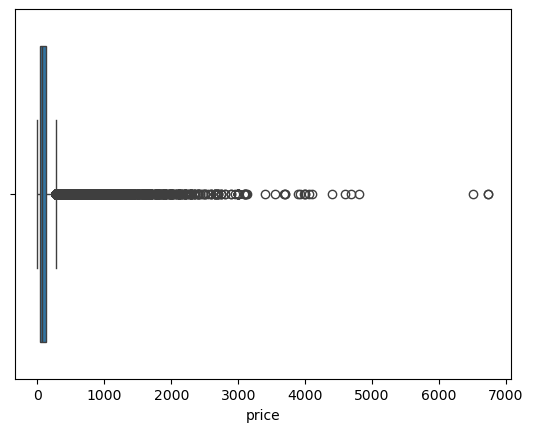

In [41]:
# Create a plot of the price column to show outliers
sns.boxplot(x=df_ord_itm["price"])

<Axes: xlabel='freight_value'>

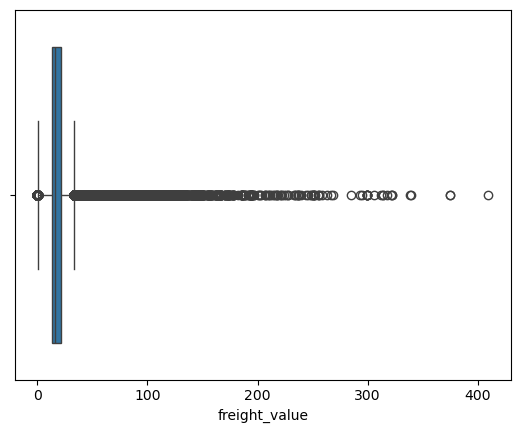

In [42]:
# Create a plot of the freight value column to show outliers
sns.boxplot(x=df_ord_itm["freight_value"])

<Axes: xlabel='price', ylabel='Count'>

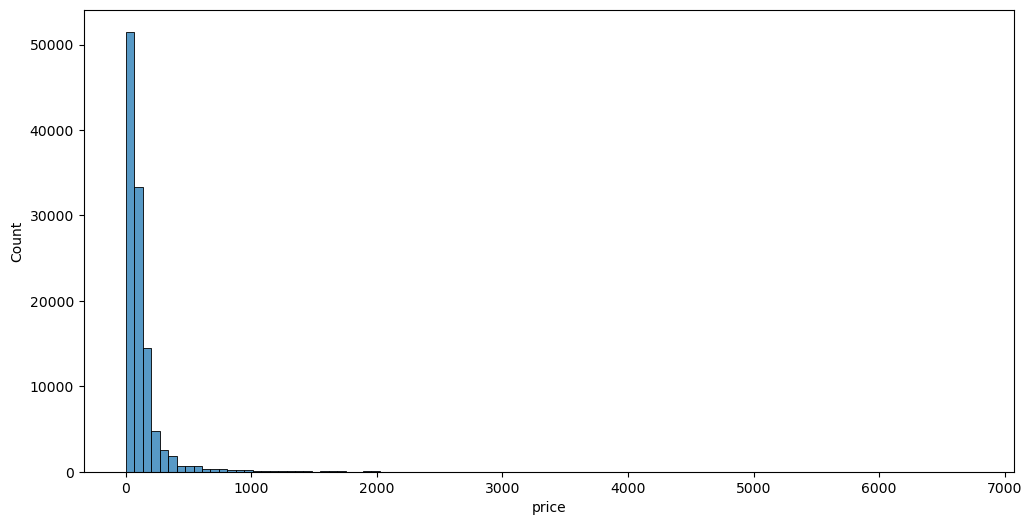

In [43]:
# Plot the histogram of the price column
plt.figure(figsize=(12, 6))

sns.histplot(data=df_ord_itm, x="price", bins=100)

<Axes: xlabel='freight_value', ylabel='Count'>

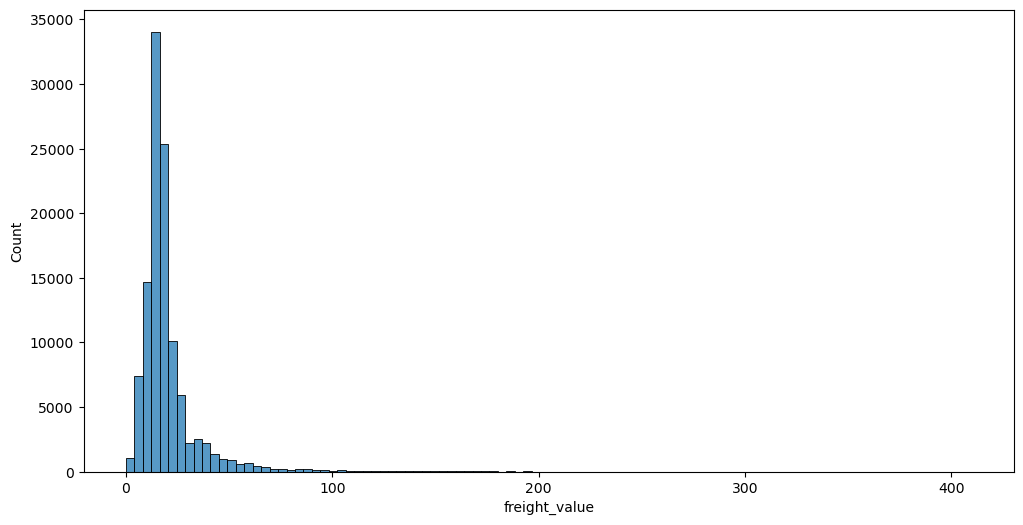

In [44]:
# Plot the histogram of the freight value column
plt.figure(figsize=(12, 6))

sns.histplot(data=df_ord_itm, x="freight_value", bins=100)

### Order Payments Table

In [46]:
# Check the data summary
df_ord_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [47]:
# Check for missing values
df_ord_pay.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [48]:
# Check for duplicate values

duplicate_value = df_ord_pay.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [49]:
# Check the basic statistic values
df_ord_pay.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

<Axes: xlabel='payment_value'>

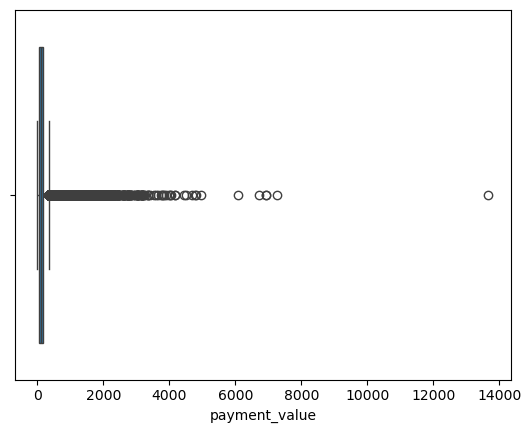

In [50]:
# Create a plot of the payment value column to show outliers
sns.boxplot(x=df_ord_pay["payment_value"])

### Order Table

In [52]:
# Check the data summary
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [53]:
# Check for missing values
df_ord.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [54]:
# Check for duplicate values

duplicate_value = df_ord.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [55]:
# Check for basic statistics
df_ord.describe()

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

### Products Table

In [57]:
# Check the data summary
df_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [58]:
# Check the decimal values in the attribute product_name_lenght
df_prods["product_name_lenght"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [59]:
# Check the decimal values in the attribute product_description_lenght
df_prods["product_description_lenght"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [60]:
# Check the decimal values in the attribute product_photos_qty
df_prods["product_photos_qty"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [61]:
# Check the decimal values in the attribute product_weight_g
df_prods["product_weight_g"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [62]:
# Check the decimal values in the attribute product_length_cm
df_prods["product_length_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [63]:
# Check the decimal values in the attribute product_height_cm
df_prods["product_height_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [64]:
# Check the decimal values in the attribute product_width_cm
df_prods["product_width_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [65]:
# Check for missing values
df_prods.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [66]:
# Check for duplicate values

duplicate_value = df_prods.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [67]:
# Check for basic statistics
df_prods.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

### Seller Table

In [69]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [70]:
# Check for missing values
df_sel.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [71]:
# Check for duplicate values

duplicate_value = df_sel.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


### Geo Table

In [73]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [74]:
# Check for missing values
df_geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [75]:
# Check for duplicate values

duplicate_value = df_geo.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 261831


### Product Name Table

In [77]:
df_product_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [78]:
# Check for missing values
df_product_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [79]:
# Check for duplicate values

duplicate_value = df_product_name.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [80]:
# Check for basic statistics
df_product_name.describe()

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

### Review Table

In [82]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [83]:
# Check for missing values
df_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [84]:
# Check for duplicate values

duplicate_value = df_review.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [85]:
# Check for basic statistics
df_review.describe()

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

## 2.2 Data Cleaning

### Customer Table

#### Data Types

In [89]:
# Change the customer_zip_code_prefix attribute to string
df_customer["customer_zip_code_prefix"] = df_customer[
    "customer_zip_code_prefix"
].astype(str)

# Check the data type of the customer_zip_code_prefix attribute
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### Order Items Table

#### Data Types

In [92]:
# Change the order_item_id attribute to string
df_ord_itm["order_item_id"] = df_ord_itm["order_item_id"].astype(str)

# Check the data type of the order_item_id attribute
df_ord_itm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  object 
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


#### Handling Outliers - Price

In [94]:
# Check again for basic statistics
df_ord_itm["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

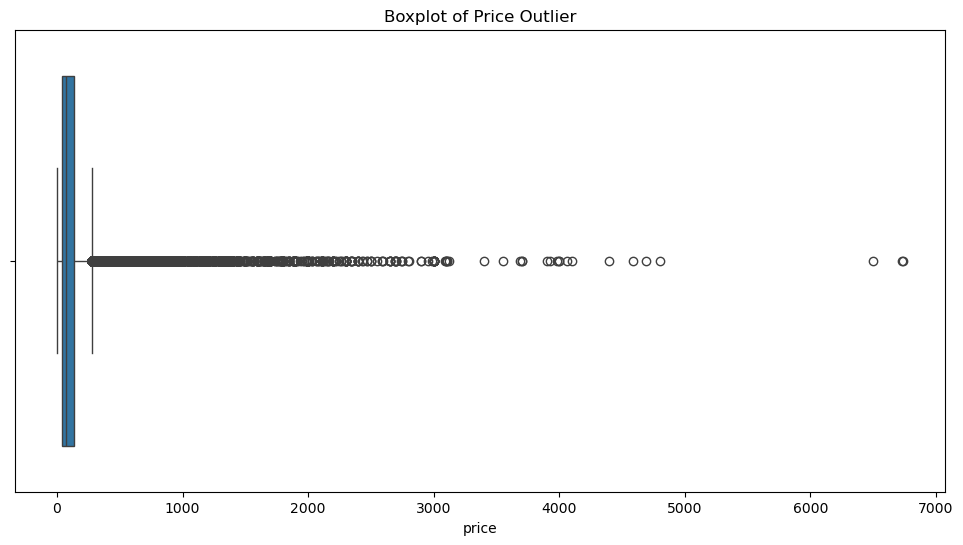

In [95]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_ord_itm["price"])
plt.title("Boxplot of Price Outlier")
plt.show()

In [96]:
# Handling outliers
# Calculate Q1, Q3 and IQR
Q1 = df_ord_itm["price"].quantile(0.25)
Q3 = df_ord_itm["price"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'price' outside the acceptable range
df_ord_itm = df_ord_itm[
    (df_ord_itm["price"] >= lower_bound) & (df_ord_itm["price"] <= upper_bound)
]

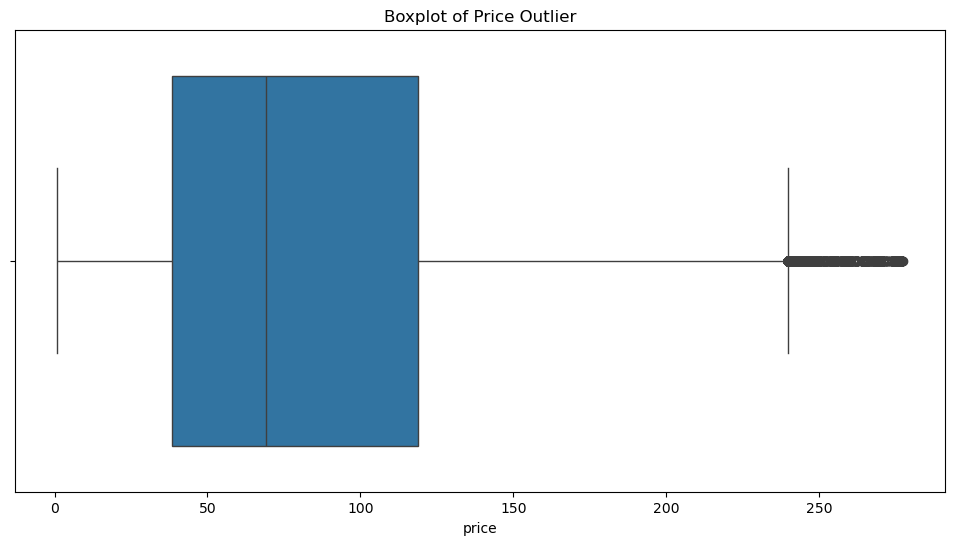

In [97]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_ord_itm["price"])
plt.title("Boxplot of Price Outlier")
plt.show()

In [98]:
# Check the statistics of the price attribute after removing outliers
df_ord_itm["price"].describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

#### Handling Outliers - Freight Value

In [100]:
# Check again for basic statistics
df_ord_itm["freight_value"].describe()

count    104223.000000
mean         18.558853
std          12.049322
min           0.000000
25%          12.790000
50%          16.010000
75%          19.840000
max         299.160000
Name: freight_value, dtype: float64

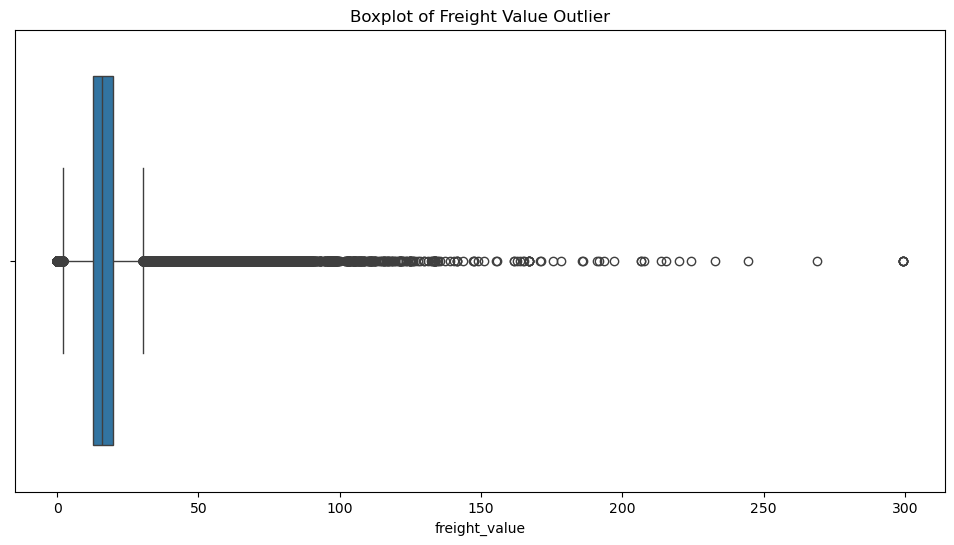

In [101]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_ord_itm["freight_value"])
plt.title("Boxplot of Freight Value Outlier")
plt.show()

In [102]:
# Handling outliers
# Calculate Q1, Q3 and IQR
Q1 = df_ord_itm["freight_value"].quantile(0.25)
Q3 = df_ord_itm["freight_value"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'price' outside the acceptable range
df_ord_itm = df_ord_itm[
    (df_ord_itm["freight_value"] >= lower_bound) & (df_ord_itm["freight_value"] <= upper_bound)
]

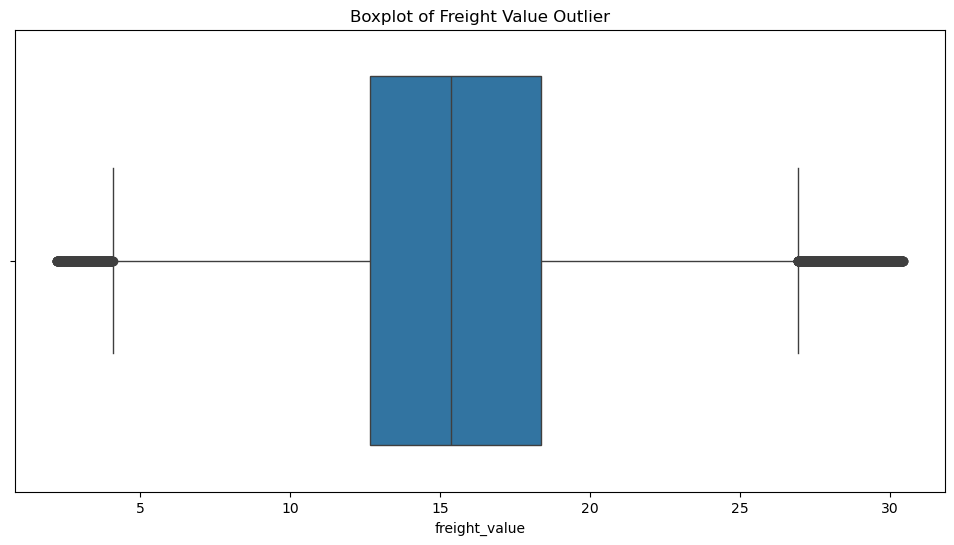

In [103]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_ord_itm["freight_value"])
plt.title("Boxplot of Freight Value Outlier")
plt.show()

In [104]:
# Check again for basic statistics
df_ord_itm["freight_value"].describe()

count    93975.000000
mean        15.751864
std          5.113773
min          2.240000
25%         12.660000
50%         15.350000
75%         18.370000
max         30.410000
Name: freight_value, dtype: float64

#### Create a Unit per Order column

In [106]:
df_ord_itm_consolidated = (
    df_ord_itm.groupby(by=["product_id", "order_id"])
    .agg(
        {
            "order_item_id": "count",
            "seller_id": "first",
            "shipping_limit_date": "first",
            "price": "first",
            "freight_value": "first",
        }
    )
    .reset_index()
)

df_ord_itm_consolidated

product_id                          order_id  \
0      00066f42aeeb9f3007548bb9d3f33c38  f30149f4a8882a08895b6a242aa0d612   
1      00088930e925c41fd95ebfe695fd2655  f5eda0ded77c1293b04c953138c8331d   
2      0009406fd7479715e4bef61dd91f2462  0bf736fd0fd5169d60de3699fcbcf986   
3      000b8f95fcb9e0096488278317764d19  3aba44d8e554ab4bb8c09f6f78032ca8   
4      000b8f95fcb9e0096488278317764d19  6f0dfb5b5398b271cc6bbd9ee263530e   
...                                 ...                               ...   
85049  fffdb2d0ec8d6a61f0a0a0db3f25b441  2878b4e373a9556df9aa1708a4e5c3c8   
85050  fffdb2d0ec8d6a61f0a0a0db3f25b441  a8159270bc9cf7d54450e079ba6b7232   
85051  fffdb2d0ec8d6a61f0a0a0db3f25b441  beaf95465b542dea76df78b2fb86a97a   
85052  fffdb2d0ec8d6a61f0a0a0db3f25b441  d6c1ed12e8eeaa15e9d5c83c79598f85   
85053  fffdb2d0ec8d6a61f0a0a0db3f25b441  dd38c566a34ff9deb93ff05d7bd6d0aa   

       order_item_id                         seller_id  shipping_limit_date  \
0                  1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-05-24 18:58:59   
1                  1  7142540dd4c91e2237acb7e911c4eba2  2017-12-18 19:32:19   
2                  1  4a3ca9315b744ce9f8e9374361493884  2017-12-29 16:12:36   
3                  1  40ec8ab6cdafbcc4f544da38c67da39a  2018-08-16 13:35:21   
4                  1  40ec8ab6cdafbcc4f544da38c67da39a  2018-08-07 22:15:19   
...              ...                               ...                  ...   
85049              1  9f505651f4a6abe901a56cdc21508025  2018-08-09 16:55:38   
85050              1  9f505651f4a6abe901a56cdc21508025  2018-04-09 05:35:27   
85051              1  9f505651f4a6abe901a56cdc21508025  2018-04-25 10:30:35   
85052              1  9f505651f4a6abe901a56cdc21508025  2018-08-14 17:25:18   
85053              1  9f505651f4a6abe901a56cdc21508025  2018-05-07 17:53:01   

        price  freight_value  
0      101.65          18.59  
1      129.90          13.93  
2      229.00          13.10  
3       58.90          19.60  
4       58.90          19.60  
...       ...            ...  
85049   34.99           7.51  
85050   29.99          18.23  
85051   34.99          18.23  
85052   34.99           7.51  
85053   34.99           7.39  

[85054 rows x 7 columns]

In [107]:
# Checking is there any info was lost
print(f"Orders in new table: {df_ord_itm_consolidated['order_id'].nunique()}")
print(f"Orders in old table: {df_ord_itm['order_id'].nunique()}")
print(f"SKUs in new table: {df_ord_itm_consolidated['product_id'].nunique()}")
print(f"SKUs in old table: {df_ord_itm['product_id'].nunique()}")
print(
    f"Total quantity in new table: {df_ord_itm_consolidated['order_item_id'].sum()}"
)
print(f"Total quantity in old table: {len(df_ord_itm['order_item_id'])}")

Orders in new table: 82186
Orders in old table: 82186
SKUs in new table: 27336
SKUs in old table: 27336
Total quantity in new table: 93975
Total quantity in old table: 93975


In [108]:
# Renaming the order_item_id column to quantity
df_ord_itm_consolidated.rename(columns={"order_item_id": "qty"}, inplace=True)
df_ord_itm_consolidated

product_id                          order_id  \
0      00066f42aeeb9f3007548bb9d3f33c38  f30149f4a8882a08895b6a242aa0d612   
1      00088930e925c41fd95ebfe695fd2655  f5eda0ded77c1293b04c953138c8331d   
2      0009406fd7479715e4bef61dd91f2462  0bf736fd0fd5169d60de3699fcbcf986   
3      000b8f95fcb9e0096488278317764d19  3aba44d8e554ab4bb8c09f6f78032ca8   
4      000b8f95fcb9e0096488278317764d19  6f0dfb5b5398b271cc6bbd9ee263530e   
...                                 ...                               ...   
85049  fffdb2d0ec8d6a61f0a0a0db3f25b441  2878b4e373a9556df9aa1708a4e5c3c8   
85050  fffdb2d0ec8d6a61f0a0a0db3f25b441  a8159270bc9cf7d54450e079ba6b7232   
85051  fffdb2d0ec8d6a61f0a0a0db3f25b441  beaf95465b542dea76df78b2fb86a97a   
85052  fffdb2d0ec8d6a61f0a0a0db3f25b441  d6c1ed12e8eeaa15e9d5c83c79598f85   
85053  fffdb2d0ec8d6a61f0a0a0db3f25b441  dd38c566a34ff9deb93ff05d7bd6d0aa   

       qty                         seller_id  shipping_limit_date   price  \
0        1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-05-24 18:58:59  101.65   
1        1  7142540dd4c91e2237acb7e911c4eba2  2017-12-18 19:32:19  129.90   
2        1  4a3ca9315b744ce9f8e9374361493884  2017-12-29 16:12:36  229.00   
3        1  40ec8ab6cdafbcc4f544da38c67da39a  2018-08-16 13:35:21   58.90   
4        1  40ec8ab6cdafbcc4f544da38c67da39a  2018-08-07 22:15:19   58.90   
...    ...                               ...                  ...     ...   
85049    1  9f505651f4a6abe901a56cdc21508025  2018-08-09 16:55:38   34.99   
85050    1  9f505651f4a6abe901a56cdc21508025  2018-04-09 05:35:27   29.99   
85051    1  9f505651f4a6abe901a56cdc21508025  2018-04-25 10:30:35   34.99   
85052    1  9f505651f4a6abe901a56cdc21508025  2018-08-14 17:25:18   34.99   
85053    1  9f505651f4a6abe901a56cdc21508025  2018-05-07 17:53:01   34.99   

       freight_value  
0              18.59  
1              13.93  
2              13.10  
3              19.60  
4              19.60  
...              ...  
85049           7.51  
85050          18.23  
85051          18.23  
85052           7.51  
85053           7.39  

[85054 rows x 7 columns]

## Order Payment Table

#### Handling Outliers

In [111]:
# Check for basic statistics again

df_ord_pay['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

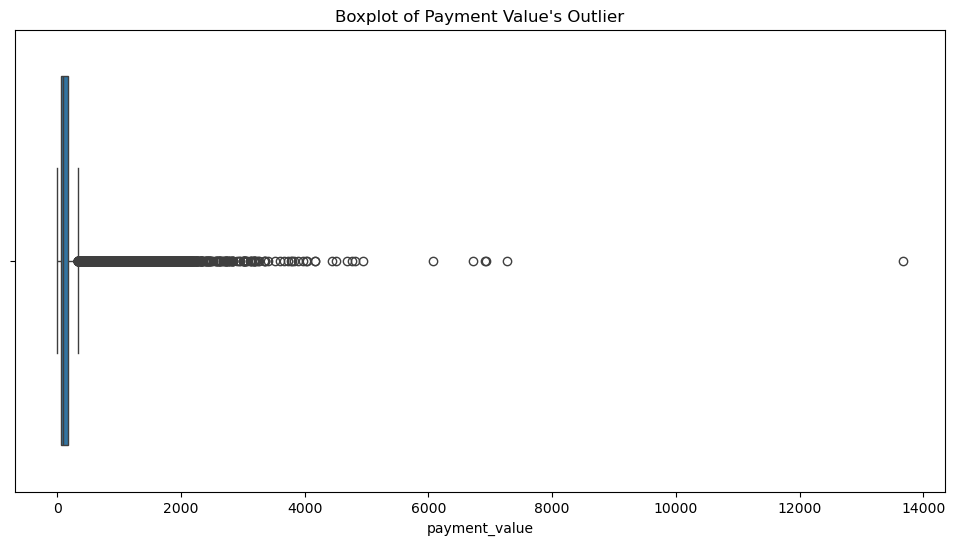

In [112]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_ord_pay["payment_value"])
plt.title("Boxplot of Payment Value's Outlier")
plt.show()

In [113]:
# Handling outliers
# Calculate Q1, Q3 and IQR
Q1 = df_ord_pay["payment_value"].quantile(0.25)
Q3 = df_ord_pay["payment_value"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'payment_value' outside the acceptable range
df_ord_pay = df_ord_pay[
    (df_ord_pay["payment_value"] >= lower_bound)
    & (df_ord_pay["payment_value"] <= upper_bound)
]

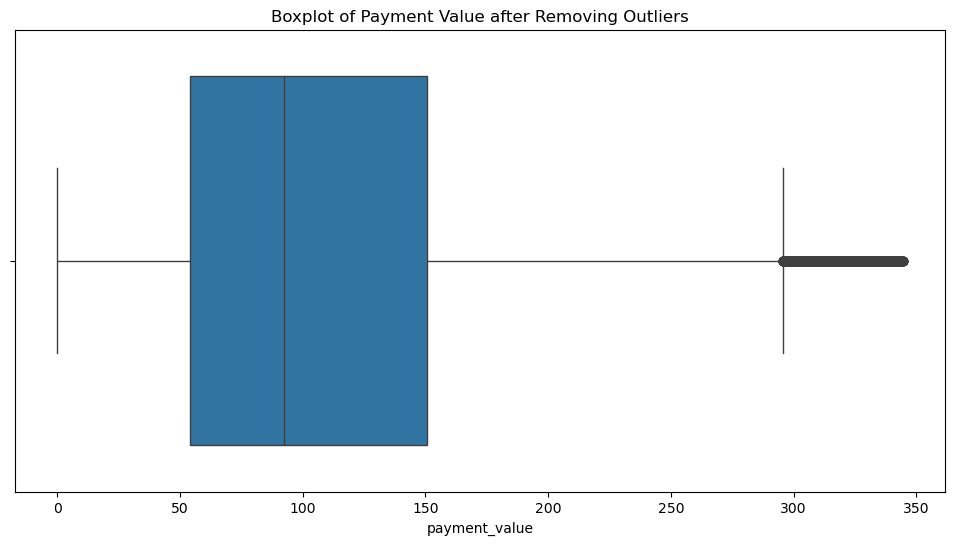

In [114]:
# Plot a boxplot of the payment_value attribute after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_ord_pay["payment_value"])
plt.title("Boxplot of Payment Value after Removing Outliers")
plt.show()

In [115]:
# Check for basic statistics again

df_ord_pay['payment_value'].describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

## Order Table

#### Data Type

In [118]:
# Change the order_purchase_timestamp attribute to datetime
df_ord["order_purchase_timestamp"] = pd.to_datetime(
    df_ord["order_purchase_timestamp"]
)

# Change the order_approved_at attribute to datetime
df_ord["order_approved_at"] = pd.to_datetime(df_ord["order_approved_at"])

# Change the order_delivered_carrier_date attribute to datetime
df_ord["order_delivered_carrier_date"] = pd.to_datetime(
    df_ord["order_delivered_carrier_date"]
)

# Change the order_delivered_customer_date attribute to datetime
df_ord["order_delivered_customer_date"] = pd.to_datetime(
    df_ord["order_delivered_customer_date"]
)

# Change the order_estimated_delivery_date attribute to datetime
df_ord["order_estimated_delivery_date"] = pd.to_datetime(
    df_ord["order_estimated_delivery_date"]
)

# Check the data type of the attributes
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [119]:
# Define a function to convert the data type of a column to datetime
def convert_to_datetime(dataFrame, columns):
    for column in columns:
        dataFrame[column] = pd.to_datetime(dataFrame[column], format="%Y-%m-%d").dt.date

In [120]:
# Convert the data type of the attributes to datetime
convert_to_datetime(
    df_ord,
    [
        "order_purchase_timestamp",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ],
)
df_ord.sort_values(by=["order_purchase_timestamp"], inplace=True)

#### Handling missing values

In [122]:
df_ord.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [123]:
# Check the missing values in percent
missing_percentage = df_ord.isnull().mean() * 100
print(missing_percentage)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64


In [124]:
# First three "order_delivered_customer_date" values are empty. So, we will drop them before using ffll() method
df_ord.drop(df_ord.index[:3], inplace=True)

In [125]:
# Check for right output
df_ord.head()

order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
83078  71303d7e93b399f5bcd537d124c0bcfa  b106b360fe2ef8849fbbd056f777b4d5   
6747   cd3b8574c82b42fc8129f6d502690c3e  7812fcebfc5e8065d31e1bb5f0017dae   
28424  be5bc2f0da14d8071e2d45451ad119d9  7ec40b22510fdbea1b08921dd39e63d8   
92636  65d1e226dfaeb8cdc42f665422522d14  70fc57eeae292675927697fe03ad3ff5   

      order_status order_purchase_timestamp   order_approved_at  \
30710    delivered               2016-09-15 2016-09-15 12:16:38   
83078     canceled               2016-10-02 2016-10-06 15:50:56   
6747     delivered               2016-10-03 2016-10-04 10:19:23   
28424    delivered               2016-10-03 2016-10-06 16:03:44   
92636     canceled               2016-10-03 2016-10-04 10:18:57   

      order_delivered_carrier_date order_delivered_customer_date  \
30710          2016-11-07 17:11:53                    2016-11-09   
83078                          NaT                           NaT   
6747           2016-10-08 10:34:01                    2016-10-14   
28424          2016-10-21 16:33:46                    2016-10-27   
92636          2016-10-25 12:14:28                    2016-11-08   

      order_estimated_delivery_date  
30710                    2016-10-04  
83078                    2016-10-25  
6747                     2016-11-23  
28424                    2016-11-07  
92636                    2016-11-25

In [126]:
# Substitute the missing values with the previous values (forward fill):
df_ord["order_delivered_customer_date"] = df_ord[
    "order_delivered_customer_date"
].ffill()

# Check the missing values again
print("Missing values: ", df_ord["order_delivered_customer_date"].isnull().sum())

Missing values:  0


In [127]:
# A column with ordinal order dates will also be included. This numerical format will ease further tasks.
# Adding a column with ordinal order dates
df_ord["date_ordinal"] = df_ord["order_purchase_timestamp"].apply(
    lambda date: date.toordinal()
)

In [128]:
# Convert columns to date time
df_ord["order_estimated_delivery_date"] = pd.to_datetime(
    df_ord["order_estimated_delivery_date"]
)
df_ord["order_delivered_customer_date"] = pd.to_datetime(
    df_ord["order_delivered_customer_date"]
)
df_ord["order_purchase_timestamp"] = pd.to_datetime(
    df_ord["order_purchase_timestamp"]
)


# Create shipping time column, which is the difference between the order estimated delivery date and the order delivered customer date
df_ord["shipping_time"] = (
    df_ord["order_delivered_customer_date"]
    - df_ord["order_estimated_delivery_date"]
    
)

# Create shipping duration column, which is the difference between the order delivered customer date and the order purchase timestamp
df_ord["shipping_duration"] = (
    df_ord["order_delivered_customer_date"] - df_ord["order_purchase_timestamp"]
)

# Create estimated duration column, which is the difference between the order estimated delivery date and the order purchase timestamp
df_ord["estimated_duration"] = (
    df_ord["order_estimated_delivery_date"] - df_ord["order_purchase_timestamp"]
)

In [129]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99438 entries, 30710 to 60938
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99438 non-null  object         
 1   customer_id                    99438 non-null  object         
 2   order_status                   99438 non-null  object         
 3   order_purchase_timestamp       99438 non-null  datetime64[ns] 
 4   order_approved_at              99278 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97657 non-null  datetime64[ns] 
 6   order_delivered_customer_date  99438 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99438 non-null  datetime64[ns] 
 8   date_ordinal                   99438 non-null  int64          
 9   shipping_time                  99438 non-null  timedelta64[ns]
 10  shipping_duration              99438 non-null  timedelta64[ns]
 11  est

In [130]:
df_ord.head()

order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
83078  71303d7e93b399f5bcd537d124c0bcfa  b106b360fe2ef8849fbbd056f777b4d5   
6747   cd3b8574c82b42fc8129f6d502690c3e  7812fcebfc5e8065d31e1bb5f0017dae   
28424  be5bc2f0da14d8071e2d45451ad119d9  7ec40b22510fdbea1b08921dd39e63d8   
92636  65d1e226dfaeb8cdc42f665422522d14  70fc57eeae292675927697fe03ad3ff5   

      order_status order_purchase_timestamp   order_approved_at  \
30710    delivered               2016-09-15 2016-09-15 12:16:38   
83078     canceled               2016-10-02 2016-10-06 15:50:56   
6747     delivered               2016-10-03 2016-10-04 10:19:23   
28424    delivered               2016-10-03 2016-10-06 16:03:44   
92636     canceled               2016-10-03 2016-10-04 10:18:57   

      order_delivered_carrier_date order_delivered_customer_date  \
30710          2016-11-07 17:11:53                    2016-11-09   
83078                          NaT                    2016-11-09   
6747           2016-10-08 10:34:01                    2016-10-14   
28424          2016-10-21 16:33:46                    2016-10-27   
92636          2016-10-25 12:14:28                    2016-11-08   

      order_estimated_delivery_date  date_ordinal shipping_time  \
30710                    2016-10-04        736222       36 days   
83078                    2016-10-25        736239       15 days   
6747                     2016-11-23        736240      -40 days   
28424                    2016-11-07        736240      -11 days   
92636                    2016-11-25        736240      -17 days   

      shipping_duration estimated_duration  
30710           55 days            19 days  
83078           38 days            23 days  
6747            11 days            51 days  
28424           24 days            35 days  
92636           36 days            53 days

In [131]:
# Check if there are repeating orders
print(f"Number of unique orders: {df_ord['order_id'].nunique()}")
print(f"Number of records: {df_ord.shape[0]}")

Number of unique orders: 99438
Number of records: 99438


## Product Table

#### Change Names

In [134]:
# Change the name of the product_name_lenght column
df_prods.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)

# Change the name of the product_description_lenght column
df_prods.rename(columns={"product_description_lenght": "product_description_length"}, inplace=True)

df_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Handling missing values

In [136]:
df_prods.isnull().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [137]:
# Check the missing values in percent
missing_percentage_2 = df_prods.isnull().mean() * 100
print(missing_percentage_2)

product_id                    0.000000
product_category_name         1.851234
product_name_length           1.851234
product_description_length    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64


In [138]:
# Check the unique values of the product_category_name attribute
print(f"Number of unique values:\n {df_prods['product_category_name'].unique()}")

Number of unique values:
 ['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_p

In [139]:
print(
    f"Frequency of each value in product_category_name attribute:\n {df_prods['product_category_name'].value_counts()}"
)

Frequency of each value in product_category_name attribute:
 product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


In [140]:
# Find the mode of the product_category_name attribute
mode_product = df_prods["product_category_name"].mode()[0]

# Fill the missing values in product_category_name with the mode
df_prods["product_category_name"] = df_prods["product_category_name"].fillna(mode_product)

In [141]:
# Find the median for the columns below and replace the missing values
median_pnl = df_prods["product_name_length"].median()
median_pdl = df_prods["product_description_length"].median()
median_ppq = df_prods["product_photos_qty"].median()
median_pw = df_prods["product_weight_g"].median()
median_pl = df_prods["product_length_cm"].median()
median_ph = df_prods["product_height_cm"].median()
median_pwd = df_prods["product_width_cm"].median()

# Fill the missing values with the median
df_prods["product_name_length"] = df_prods["product_name_length"].fillna(median_pnl)
df_prods["product_description_length"] = df_prods["product_description_length"].fillna(median_pdl)
df_prods["product_photos_qty"] = df_prods["product_photos_qty"].fillna(median_ppq)
df_prods["product_weight_g"] = df_prods["product_weight_g"].fillna(median_pw)
df_prods["product_length_cm"] = df_prods["product_length_cm"].fillna(median_pl)
df_prods["product_height_cm"] = df_prods["product_height_cm"].fillna(median_ph)
df_prods["product_width_cm"] = df_prods["product_width_cm"].fillna(median_pwd)

In [142]:
# Check again for missing values
print(f"Missing values: {df_prods.isnull().sum().sum()}")

Missing values: 0


#### Handling data types

In [144]:
# Change the datatype of the product_name_length attribute to int
df_prods["product_name_length"] = df_prods["product_name_length"].astype(int)

# Change the datatype of the product_description_length attribute to int
df_prods["product_description_length"] = df_prods[
    "product_description_length"
].astype(int)

# Change the datatype of the product_photos_qty attribute to int
df_prods["product_photos_qty"] = df_prods["product_photos_qty"].astype(int)

# Change the datatype of the product_weight_g attribute to int
df_prods["product_weight_g"] = df_prods["product_weight_g"].astype(int)

# Change the datatype of the product_length_cm attribute to int
df_prods["product_length_cm"] = df_prods["product_length_cm"].astype(int)

# Change the datatype of the product_height_cm attribute to int
df_prods["product_height_cm"] = df_prods["product_height_cm"].astype(int)

# Change the datatype of the product_width_cm attribute to int
df_prods["product_width_cm"] = df_prods["product_width_cm"].astype(int)

In [145]:
df_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_length         32951 non-null  int64 
 3   product_description_length  32951 non-null  int64 
 4   product_photos_qty          32951 non-null  int64 
 5   product_weight_g            32951 non-null  int64 
 6   product_length_cm           32951 non-null  int64 
 7   product_height_cm           32951 non-null  int64 
 8   product_width_cm            32951 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


## Seller Table

## Handling Data Types

In [148]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [149]:
# Change the seller_zip_code_prefix attribute to string
df_sel["seller_zip_code_prefix"] = df_sel["seller_zip_code_prefix"].astype(str)

# Check the data type of the seller_zip_code_prefix attribute
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [150]:
df_sel.head()

seller_id seller_zip_code_prefix        seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                  13023           campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                  13844         mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d                  20031     rio de janeiro   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                   4195          sao paulo   
4  51a04a8a6bdcb23deccc82b0b80742cf                  12914  braganca paulista   

  seller_state  
0           SP  
1           SP  
2           RJ  
3           SP  
4           SP

## Geo Table

#### Handling Data Types

In [153]:
# Change the geolocation_zip_code_prefix attribute to string
df_geo["geolocation_zip_code_prefix"] = df_geo[
    "geolocation_zip_code_prefix"
].astype(str)

# Check the data type of the geolocation_zip_code_prefix attribute
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


#### Duplicated Values

In [155]:
# Drop the duplicate values in the geolocation_df
df_geo.drop_duplicates(
    subset=["geolocation_zip_code_prefix"], keep="first", inplace=True
)

# Check the duplicate values in the geolocation_df
duplicate_value = df_geo.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Inconsistent Values

In [157]:
# Check unique data in attribute geolocation_city
print(f"Number of unique values:\n {df_geo['geolocation_city'].unique()}")

Number of unique values:
 ['sao paulo' 'são paulo' 'osasco' ... 'floriano peixoto' 'erebango'
 'santa cecilia do sul']


In [158]:
# Check the frequency of each value in attribute geolocation_city
df_geo.groupby(by=["geolocation_city", "geolocation_zip_code_prefix"]).agg(
    {"geolocation_city": "count"}
)

geolocation_city
geolocation_city      geolocation_zip_code_prefix                  
abadia de goias       75345                                       1
abadia dos dourados   38540                                       1
abadiania             72940                                       1
abaete                35620                                       1
abaetetuba            68440                                       1
...                                                             ...
águas lindas de goiás 72927                                       1
álvaro de carvalho    17410                                       1
ângulo                86755                                       1
óbidos                68250                                       1
óleo                  18790                                       1

[19015 rows x 1 columns]

In [159]:
df_geo.groupby(by=["geolocation_city", "geolocation_zip_code_prefix"]).agg(
    {"geolocation_city": "nunique"}
)

geolocation_city
geolocation_city      geolocation_zip_code_prefix                  
abadia de goias       75345                                       1
abadia dos dourados   38540                                       1
abadiania             72940                                       1
abaete                35620                                       1
abaetetuba            68440                                       1
...                                                             ...
águas lindas de goiás 72927                                       1
álvaro de carvalho    17410                                       1
ângulo                86755                                       1
óbidos                68250                                       1
óleo                  18790                                       1

[19015 rows x 1 columns]

In [160]:
# Data homogenization
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "abadiânia" if x == "abadiania" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "abaeté" if x == "abaete" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "abaré" if x == "abare" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "abatiá" if x == "abatia" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "são paulo" if x == "sao paulo" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "cidade gaúcha" if x == "cidade" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "arraial do cabo" if x == "...arraial do cabo" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "quarto centenário" if x == "4o. centenario" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "quarto centenário" if x == "4º centenario" else x
)
df_geo.geolocation_city = df_geo.geolocation_city.apply(
    lambda x: "quarto centenário" if x == "quarto centenario" else x
)

In [161]:
df_geo.geolocation_city.unique()

array(['são paulo', 'osasco', 'carapicuíba', ..., 'floriano peixoto',
       'erebango', 'santa cecilia do sul'], dtype=object)

## Review Table

#### Data Types

In [164]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [165]:
# Change the review_creation_date data type to date
df_review["review_creation_date"] = pd.to_datetime(
    df_review["review_creation_date"]
)

# Change the review_answer_timestamp data type to date
df_review["review_answer_timestamp"] = pd.to_datetime(
    df_review["review_answer_timestamp"]
)

# Check the data type of the attributes
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [166]:
df_review.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

#### Missing Values

In [168]:
# Backup the dataset order_reviews_df
df_review_cleaned = df_review.copy()

In [169]:
df_review_cleaned.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [170]:
# Fill the missing values in review_comment_title with "No comment"
df_review_cleaned["review_comment_title"] = df_review_cleaned["review_comment_title"].fillna("No comment")

# Fill the missing values in review_comment_message with "No comment"
df_review_cleaned["review_comment_message"] = df_review_cleaned["review_comment_message"].fillna("No comment")

# Check the missing values again
print(f"Missing values: {df_review_cleaned.isnull().sum().sum()}")

Missing values: 0


In [171]:
# Merge the cleaned data frame back to the original one
df_review = pd.merge(
    df_review_cleaned, df_review, how="left"
).copy()
df_review_cleaned.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4           No comment   
1             5           No comment   
2             5           No comment   
3             5           No comment   
4             5           No comment   

                              review_comment_message review_creation_date  \
0                                         No comment           2018-01-18   
1                                         No comment           2018-03-10   
2                                         No comment           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

## 3. Merge the Datasets

#### Merging the tables order and order items

In [174]:
# Check the shape before merging
df_ord.shape

(99438, 12)

In [175]:
# Check the shape before merging
df_ord_itm.shape

(93975, 7)

In [176]:
# Merge the tables

df_sales = df_ord.merge(df_ord_itm_consolidated, on="order_id")

In [177]:
# Check the data frame after merging
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85053 entries, 0 to 85052
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85053 non-null  object         
 1   customer_id                    85053 non-null  object         
 2   order_status                   85053 non-null  object         
 3   order_purchase_timestamp       85053 non-null  datetime64[ns] 
 4   order_approved_at              85041 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84273 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85053 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85053 non-null  datetime64[ns] 
 8   date_ordinal                   85053 non-null  int64          
 9   shipping_time                  85053 non-null  timedelta64[ns]
 10  shipping_duration              85053 non-null  timedelta64[ns]
 11  es

In [178]:
df_sales.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     780
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
dtype: int64

#### Merging the sales table with the product table

In [180]:
# Check the shape before merging
df_sales.shape

(85053, 18)

In [181]:
# Check the shape before merging
df_prods.shape

(32951, 9)

In [182]:
# Merge the tables

df_sales = df_sales.merge(df_prods, on="product_id")

In [183]:
# Check the data frame after merging
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85053 entries, 0 to 85052
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85053 non-null  object         
 1   customer_id                    85053 non-null  object         
 2   order_status                   85053 non-null  object         
 3   order_purchase_timestamp       85053 non-null  datetime64[ns] 
 4   order_approved_at              85041 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84273 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85053 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85053 non-null  datetime64[ns] 
 8   date_ordinal                   85053 non-null  int64          
 9   shipping_time                  85053 non-null  timedelta64[ns]
 10  shipping_duration              85053 non-null  timedelta64[ns]
 11  es

#### Merging the sales table with the product category name table

In [185]:
df_sales.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     780
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
dtype: int64

In [186]:
# Check the shape before merging
df_sales.shape

(85053, 26)

In [187]:
# Check the data before merging
df_product_name.shape

(71, 2)

In [188]:
# Merge the tables

df_sales = df_sales.merge(df_product_name, on="product_category_name")

In [189]:
# Check the data frame after merging
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85035 entries, 0 to 85034
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85035 non-null  object         
 1   customer_id                    85035 non-null  object         
 2   order_status                   85035 non-null  object         
 3   order_purchase_timestamp       85035 non-null  datetime64[ns] 
 4   order_approved_at              85023 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84257 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85035 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85035 non-null  datetime64[ns] 
 8   date_ordinal                   85035 non-null  int64          
 9   shipping_time                  85035 non-null  timedelta64[ns]
 10  shipping_duration              85035 non-null  timedelta64[ns]
 11  es

In [190]:
df_sales.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     778
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
d

#### Merging the sales table with the review table

In [192]:
# Check the shape before merging
df_sales.shape

(85035, 27)

In [193]:
# Check the data frame after merging
df_review.shape

(99224, 7)

In [194]:
df_review.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [195]:
# Merge the tables

df_sales = df_sales.merge(df_review, on="order_id", how="left")

In [196]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [197]:
df_sales.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     785
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
r

In [198]:
# Address missing values after merging
df_sales["review_id"] = df_sales["review_id"].fillna("Not found")
df_sales["review_score"] = df_sales["review_score"].fillna(0)
df_sales["review_comment_title"] = df_sales["review_comment_title"].fillna("No comment")
df_sales["review_comment_message"] = df_sales["review_comment_message"].fillna("No comment")
df_sales["review_creation_date"] = df_sales["review_creation_date"].fillna("No Entry")
df_sales["review_answer_timestamp"] = df_sales["review_answer_timestamp"].fillna("No Entry")

In [199]:
# Check again on missing values
df_sales.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     785
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
r

#### Create a Customer Table + Geo Location

In [201]:
# Check the shape before merging
df_sales.shape

(85579, 33)

In [202]:
# Check the data frame after merging
df_customer.shape

(99441, 5)

In [203]:
# Create the table

df_sales_cust = df_sales.merge(df_customer, on="customer_id", how="left")

In [204]:
df_sales_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [205]:
# Merge the Geo location set
df_sales_cust = df_sales_cust.merge(df_geo, left_on ='customer_zip_code_prefix',
                                    right_on = 'geolocation_zip_code_prefix',
                                    how='left')

In [206]:
df_sales_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [207]:
df_sales_cust.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     785
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
r

In [208]:
# Addressing the missing values in the geo location variables
df_sales_cust[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']] = \
    df_sales_cust[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']].ffill()

In [209]:
# Check for missing values again
df_sales_cust.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     785
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
r

#### Create a Seller Table + Geo Location

In [211]:
# Check the shape before merging
df_sales.shape

(85579, 33)

In [212]:
# Check the data frame after merging
df_sel.shape

(3095, 4)

In [213]:
# Create the table

df_sales_sel = df_sales.merge(df_sel, on="seller_id")

In [214]:
df_sales_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [215]:
# Merge the Geo location set
df_sales_sel = df_sales_sel.merge(df_geo, left_on ='seller_zip_code_prefix',
                                    right_on = 'geolocation_zip_code_prefix',
                                    how='left')

In [216]:
df_sales_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [217]:
df_sales_sel.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     785
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
r

In [218]:
# Addressing the missing values in the geo location variables
df_sales_sel[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']] = \
    df_sales_sel[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']].ffill()

In [219]:
# Check again on missing values
df_sales_sel.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 12
order_delivered_carrier_date     785
order_delivered_customer_date      0
order_estimated_delivery_date      0
date_ordinal                       0
shipping_time                      0
shipping_duration                  0
estimated_duration                 0
product_id                         0
qty                                0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
r

## 4. Hypothesis testing

- Hypothesis 1: If shipping time is higher, then the shipping duration is higher?
- Hypothesis 2: If the price is higher, then the freight value is higher?
- Hypothesis 3: If the estimated duration is higher, then the freight value is higher?

### 4.1 EDA - Explore Relationships

In [223]:
df_sales_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [224]:
# Create a subset for relationship exploration

df_sales_cust_sub = df_sales_cust[['date_ordinal','shipping_time','shipping_duration','estimated_duration','qty','price','freight_value','product_photos_qty','product_weight_g','review_score']]

In [225]:
df_sales_cust_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   date_ordinal        85579 non-null  int64          
 1   shipping_time       85579 non-null  timedelta64[ns]
 2   shipping_duration   85579 non-null  timedelta64[ns]
 3   estimated_duration  85579 non-null  timedelta64[ns]
 4   qty                 85579 non-null  int64          
 5   price               85579 non-null  float64        
 6   freight_value       85579 non-null  float64        
 7   product_photos_qty  85579 non-null  int64          
 8   product_weight_g    85579 non-null  int64          
 9   review_score        85579 non-null  float64        
dtypes: float64(3), int64(4), timedelta64[ns](3)
memory usage: 6.5 MB


In [226]:
# Change the data type of following columns, being suitable for the correlation analysis
# Convert timedelta columns to total days
df_sales_cust_sub.loc[:, 'shipping_time_days'] = df_sales_cust_sub['shipping_time'].dt.total_seconds() / (60 * 60 * 24)  # Total days
df_sales_cust_sub.loc[:, 'shipping_duration_days'] = df_sales_cust_sub['shipping_duration'].dt.total_seconds() / (60 * 60 * 24)  # Total days
df_sales_cust_sub.loc[:, 'estimated_duration_days'] = df_sales_cust_sub['estimated_duration'].dt.total_seconds() / (60 * 60 * 24)  # Total days

/var/folders/y8/whbdk63x63398jrksgc7pp0r0000gn/T/ipykernel_13228/1788991665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_cust_sub.loc[:, 'shipping_time_days'] = df_sales_cust_sub['shipping_time'].dt.total_seconds() / (60 * 60 * 24)  # Total days
/var/folders/y8/whbdk63x63398jrksgc7pp0r0000gn/T/ipykernel_13228/1788991665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_cust_sub.loc[:, 'shipping_duration_days'] = df_sales_cust_sub['shipping_duration'].dt.total_seconds() / (60 * 60 

In [227]:
# Check for the change of data type
df_sales_cust_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   date_ordinal             85579 non-null  int64          
 1   shipping_time            85579 non-null  timedelta64[ns]
 2   shipping_duration        85579 non-null  timedelta64[ns]
 3   estimated_duration       85579 non-null  timedelta64[ns]
 4   qty                      85579 non-null  int64          
 5   price                    85579 non-null  float64        
 6   freight_value            85579 non-null  float64        
 7   product_photos_qty       85579 non-null  int64          
 8   product_weight_g         85579 non-null  int64          
 9   review_score             85579 non-null  float64        
 10  shipping_time_days       85579 non-null  float64        
 11  shipping_duration_days   85579 non-null  float64        
 12  estimated_duration

In [228]:
# Drop timedelta columns
# Drop the original timedelta columns after creating the days columns
df_sales_cust_sub = df_sales_cust_sub.drop(['shipping_time', 'shipping_duration', 'estimated_duration'], axis=1)

# Verify the column types again
print(df_sales_cust_sub.dtypes)

date_ordinal                 int64
qty                          int64
price                      float64
freight_value              float64
product_photos_qty           int64
product_weight_g             int64
review_score               float64
shipping_time_days         float64
shipping_duration_days     float64
estimated_duration_days    float64
dtype: object


In [229]:
# Create a correlation martix to find suitable relationships for further analysis
corr = df_sales_cust_sub.corr()
print(corr)

                         date_ordinal       qty     price  freight_value  \
date_ordinal                 1.000000  0.003330  0.001455       0.007236   
qty                          0.003330  1.000000 -0.070719      -0.020458   
price                        0.001455 -0.070719  1.000000       0.297347   
freight_value                0.007236 -0.020458  0.297347       1.000000   
product_photos_qty          -0.009240 -0.040171 -0.007096       0.004908   
product_weight_g            -0.051592  0.005702  0.301048       0.302184   
review_score                 0.013442 -0.081309  0.004941      -0.028909   
shipping_time_days           0.122135 -0.011831 -0.008951      -0.104481   
shipping_duration_days      -0.108767 -0.005385  0.053173       0.312205   
estimated_duration_days     -0.258994  0.008109  0.067187       0.455286   

                         product_photos_qty  product_weight_g  review_score  \
date_ordinal                      -0.009240         -0.051592      0.013442   
qty  

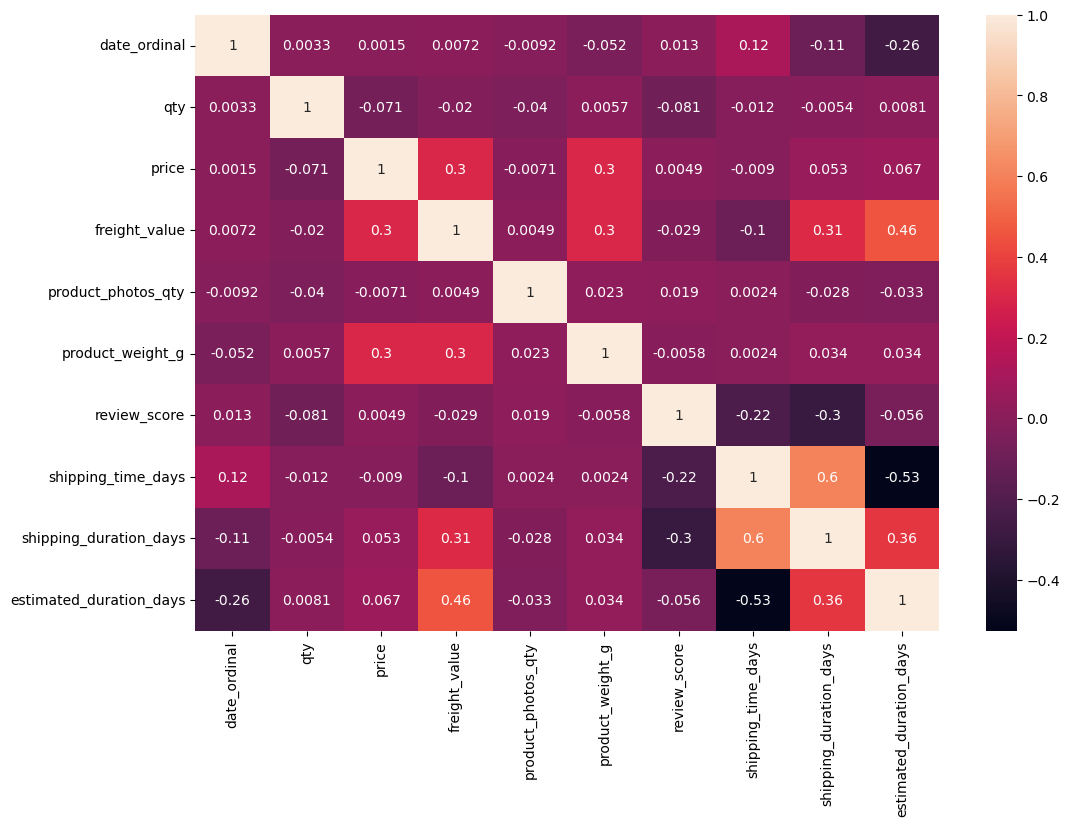

In [230]:
# Create the colored Heatmap

# Create a subplot with matplotlib
fig1,ax = plt.subplots(figsize=(12,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sales_cust_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [231]:
# Export Visualization
fig1.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'heat_map_relationships.png'), bbox_inches='tight')

__Comment:__

- 0: no relationship
- 0.1–0.3: weak relationship
- 0.3–0.5: moderate relationship
- 0.5–1.0: strong relationship

***

Observing the heatmap reveeals, that the data set contains certain relationships between variables, which are suitable for further exploration and answering the hypothesis and possbile business questions.

***

__Shipping Time and Estimated Duration:__ 0.53 = positive strong relationship
***
__Shipping Time and Review Score:__ 0.22 = positive weak relationship
***
__Shipping Time and Shipping Duration:__ 0.6 = positive strong relationship
***
__Shipping Duration and Review Score:__ -0.3 = negative weak relationship
***
__Shipping Duration and Estimated Duration:__ 0.36 = positive weak relationship
***
__Estimated Duration and Freight Value:__ 0.46 = positive moderate relationship
***
__Price and Freight Value:__ 0.3 = positive weak relationship

### 4.1.1 How does the shipping time compare with the estimated time?

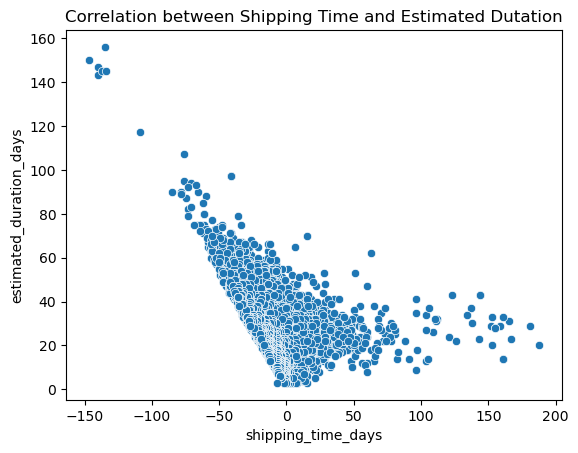

In [234]:
# Create a scatterplot to examine the strongest correlations shown in the heatmap above

fig2 = sns.scatterplot(x='shipping_time_days', y='estimated_duration_days', data=df_sales_cust_sub)
plt.title('Correlation between Shipping Time and Estimated Dutation')
plt.show()

__Comment:__ The deliveries seem to be typically on schedule with some exceptions of delayed shippings. The shippins appear to delay mostly between 0 and 40 days.

In [236]:
# Export Visualization
fig2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'correlation_shiptime_estitime.png'), bbox_inches='tight')

### 4.1.2 How does the shipping time and duration effects the review score?

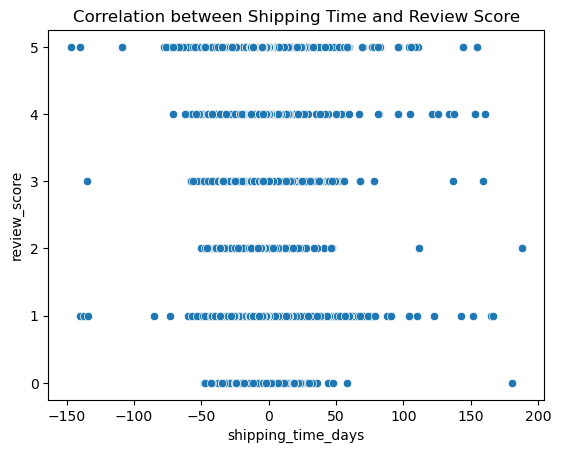

In [238]:
# Create a scatterplot to examine the strongest correlations shown in the heatmap above

fig3 = sns.scatterplot(x='shipping_time_days', y='review_score', data=df_sales_cust_sub)
plt.title('Correlation between Shipping Time and Review Score')
plt.show()

__Comment:__ Customers which experience a shipping delay over 50 days are likely to give a review_score of 1 which represent the most data points. But this fact is just an assumption, which can not be confirmed due the weak correlation and others customers giving higher scores even the shippment got delayed.

In [240]:
# Export Visualization
fig3.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'correlation_score_shiptime.png'), bbox_inches='tight')

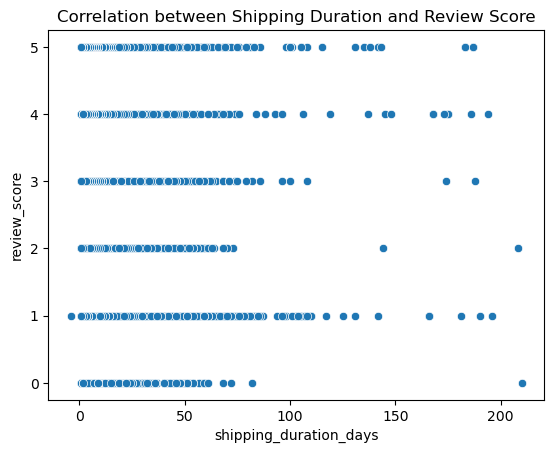

In [241]:
# Create a scatterplot to examine the strongest correlations shown in the heatmap above

fig4 = sns.scatterplot(x='shipping_duration_days', y='review_score', data=df_sales_cust_sub)
plt.title('Correlation between Shipping Duration and Review Score')
plt.show()

__Comment:__ Examine this plot shows a similar picture compared to the previous relationship. It appears that customers experiencing a shipping duration over 80 days are likely to give a low review score. But some customers are also giving a better score on the same duration.

In [243]:
# Export Visualization
fig4.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'correlation_score_shipdur.png'), bbox_inches='tight')

In [244]:
#1
# Filter the DataFrame where review_score == 1
filtered_df = df_sales_cust_sub[df_sales_cust_sub['review_score'] == 1]
# Group by shipping_duration_days and count the occurrences
shipping_duration_review1_count = filtered_df.groupby('shipping_duration_days').size().sort_values(ascending=False).reset_index(name='count')

#2
# Filter the DataFrame where review_score == 2
filtered_df_2 = df_sales_cust_sub[df_sales_cust_sub['review_score'] == 2]
# Group by shipping_duration_days and count the occurrences
shipping_duration_review2_count = filtered_df_2.groupby('shipping_duration_days').size().sort_values(ascending=False).reset_index(name='count')

#3
# Filter the DataFrame where review_score == 3
filtered_df_3 = df_sales_cust_sub[df_sales_cust_sub['review_score'] == 3]
# Group by shipping_duration_days and count the occurrences
shipping_duration_review3_count = filtered_df_3.groupby('shipping_duration_days').size().sort_values(ascending=False).reset_index(name='count')

#4
# Filter the DataFrame where review_score == 4
filtered_df_4 = df_sales_cust_sub[df_sales_cust_sub['review_score'] == 4]
# Group by shipping_duration_days and count the occurrences
shipping_duration_review4_count = filtered_df_4.groupby('shipping_duration_days').size().sort_values(ascending=False).reset_index(name='count')

#5
# Filter the DataFrame where review_score == 5
filtered_df_5 = df_sales_cust_sub[df_sales_cust_sub['review_score'] == 5]
# Group by shipping_duration_days and count the occurrences
shipping_duration_review5_count = filtered_df_5.groupby('shipping_duration_days').size().sort_values(ascending=False).reset_index(name='count')


print(shipping_duration_review1_count)
print(shipping_duration_review2_count)
print(shipping_duration_review3_count)
print(shipping_duration_review4_count)
print(shipping_duration_review5_count)

     shipping_duration_days  count
0                       7.0    524
1                       6.0    487
2                       8.0    468
3                      10.0    460
4                       9.0    453
..                      ...    ...
100                    83.0      1
101                    80.0      1
102                    77.0      1
103                    74.0      1
104                   196.0      1

[105 rows x 2 columns]
    shipping_duration_days  count
0                      8.0    176
1                      7.0    165
2                      6.0    162
3                      9.0    151
4                      5.0    137
..                     ...    ...
61                    61.0      1
62                    59.0      1
63                    55.0      1
64                    53.0      1
65                   208.0      1

[66 rows x 2 columns]
    shipping_duration_days  count
0                      7.0    496
1                      8.0    479
2                      

### 4.1.3 Is there a relationship between shipping duration and shipping time?

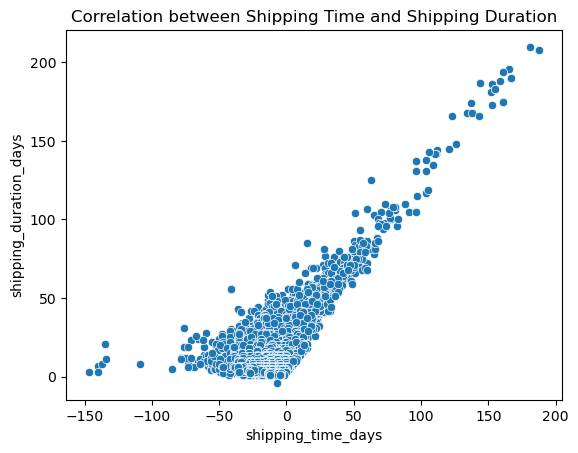

In [246]:
# Create a scatterplot to examine the strongest correlations shown in the heatmap above

fig5 = sns.scatterplot(x='shipping_time_days', y='shipping_duration_days', data=df_sales_cust_sub)
plt.title('Correlation between Shipping Time and Shipping Duration')
plt.show()

__Comment:__ The plot shows that longer shipping time correlations with a higher shipping duration. Tight cluster around 0, means that most deliveries arrived on time.

In [248]:
# Export Visualization
fig5.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'correlation_shipdur_shiptime.png'), bbox_inches='tight')

### 4.1.4 Is there a relationship between estimated shipping duration and freight value?

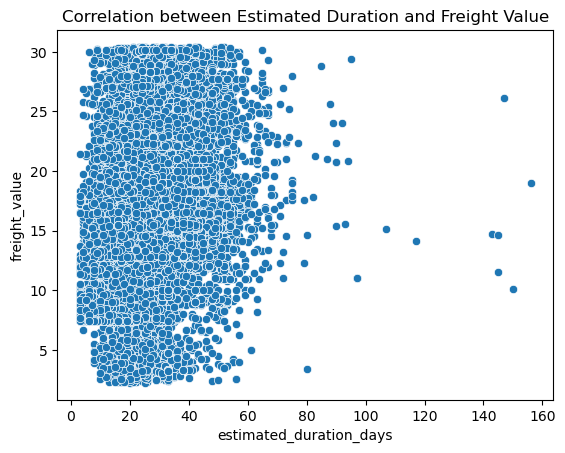

In [250]:
# Create a scatterplot to examine the strongest correlations shown in the heatmap above

fig6 = sns.scatterplot(x='estimated_duration_days', y='freight_value', data=df_sales_cust_sub)
plt.title('Correlation between Estimated Duration and Freight Value')
plt.show()

__Comment:__ The freight value is not strongly effecting the estimated delivery duration. What means that most shippings are delivered faster even so the freight value might be higher and vise versa. The slight impact comes due to some deliveries where the hight freight value comes with a higher duration in delivery.

### 4.1.5 Is there a relationship between estimated price and freight value?

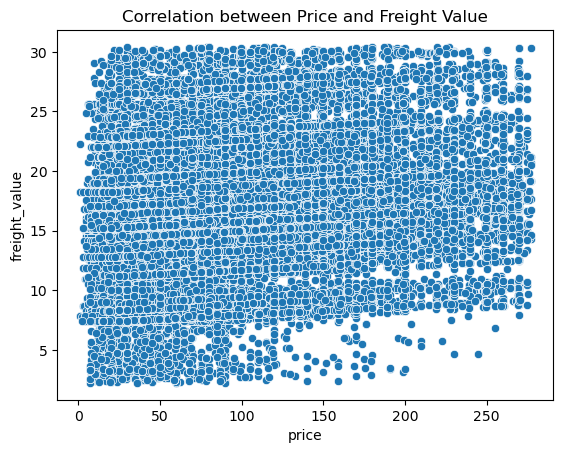

In [253]:
# Create a scatterplot to examine the strongest correlations shown in the heatmap above

fig6 = sns.scatterplot(x='price', y='freight_value', data=df_sales_cust_sub)
plt.title('Correlation between Price and Freight Value')
plt.show()

__Comment:__ The Price is not strongly impacting the freight value below 7. Which means cheaper products come with cheaper shipping cost until 7. Overall the freight value is not strongly depending on the price since the data points are seem evenely scattered.

In [255]:
# Export Visualization
fig6.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'correlation_price_freight.png'), bbox_inches='tight')

### 4.2 Create a pair plot for further exploration purposes

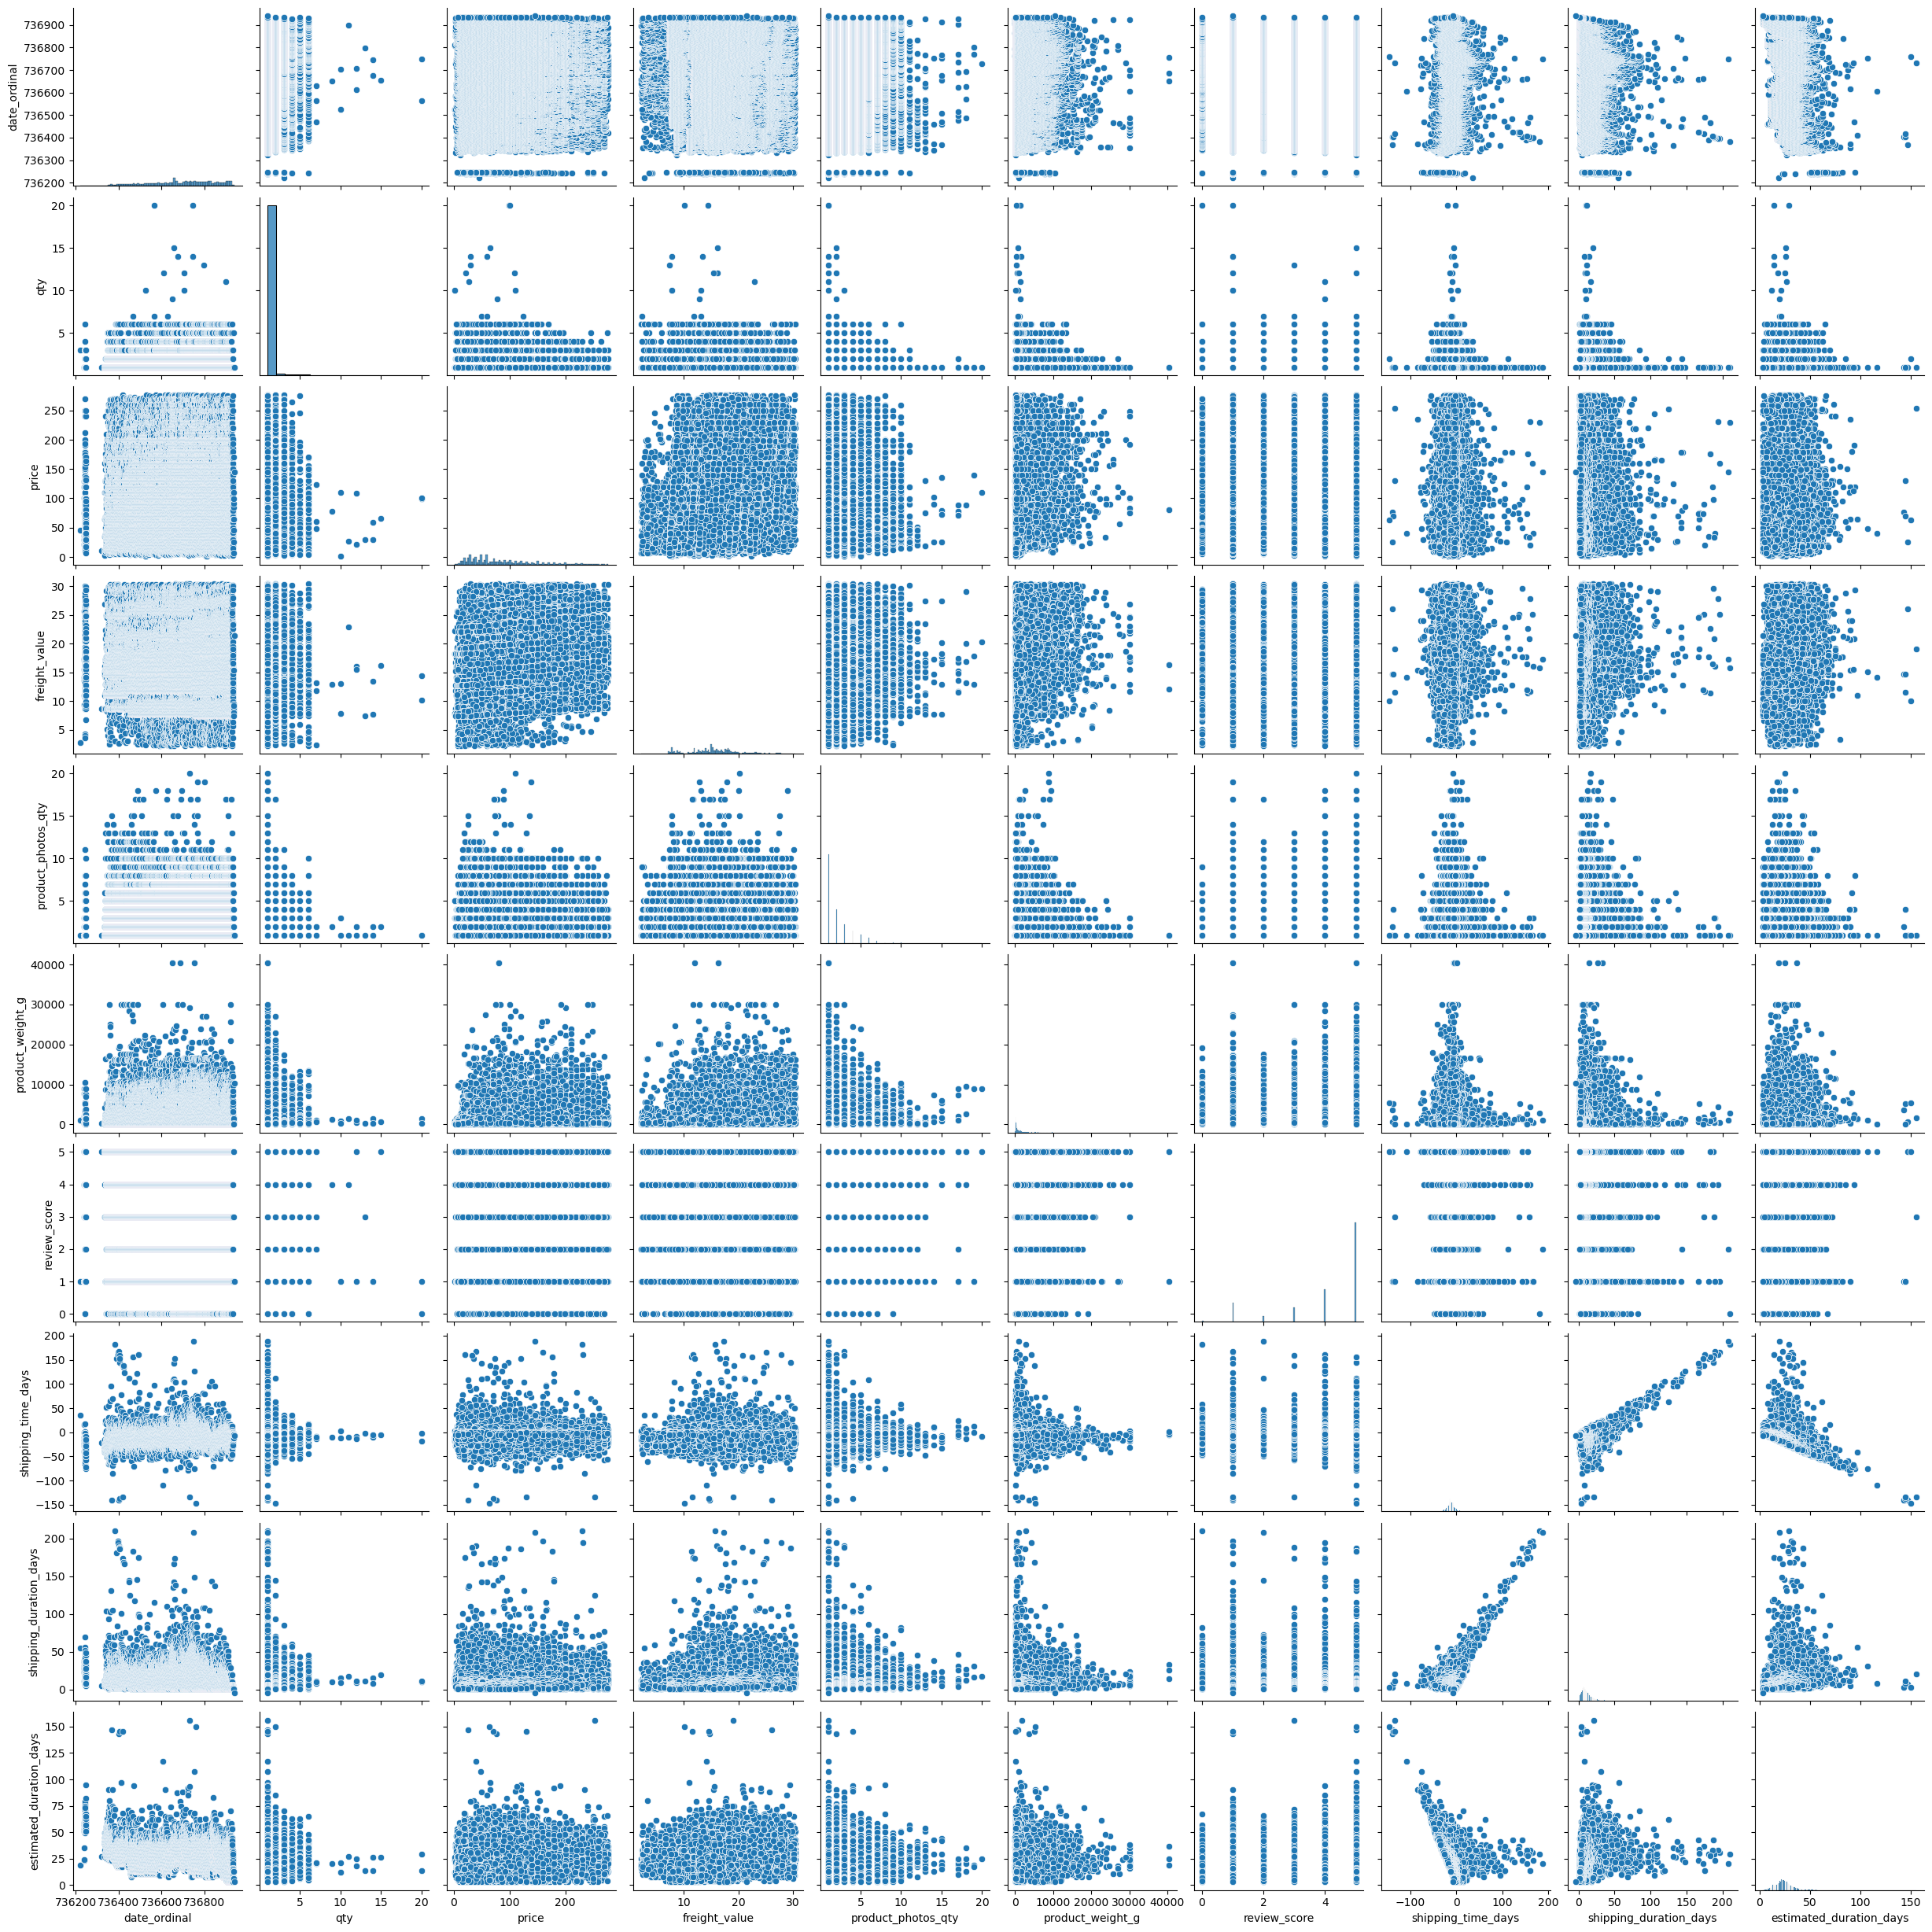

In [257]:
# Create a pair plot of the sub_set

fig7 = sns.pairplot(df_sales_cust_sub)
plt.show()

__Comment:__ There seem to be no additional relationships to explore for answering the business questions or hypothesis of this analysis. There I will continue with the next step.

In [259]:
# Export Visualization
fig7.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'pair_plot_values.png'), bbox_inches='tight')

### 4.3 Create a categorical plot for further exploration purposes

#### Shipping

In [262]:
# Create a new categorical variable for shipping time

df_sales_cust_sub.loc[df_sales_cust_sub['shipping_duration_days'] <= 10, 'duration_level'] = 'short duration'

df_sales_cust_sub.loc[(df_sales_cust_sub['shipping_duration_days'] > 10) & (df_sales_cust_sub['shipping_duration_days'] <= 60), 'duration_level'] = 'middle duration'

df_sales_cust_sub.loc[df_sales_cust_sub['shipping_duration_days'] > 60, 'duration_level'] = 'long duration'


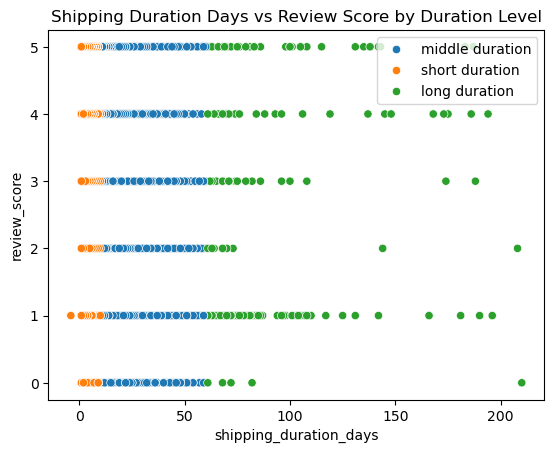

In [263]:
# Compare the shipping duration days and review score length by duration level
fig8, ax = plt.subplots() 
sns.scatterplot(x='shipping_duration_days', y='review_score', hue='duration_level', data=df_sales_cust_sub)
plt.legend(loc='upper right')  # Specify a location to speed up plotting
plt.title('Shipping Duration Days vs Review Score by Duration Level')
plt.show()

__Comment:__ Customer that experiece long durations are most likely to give either a low review score or a high score. The Middle score, from 2 and 3 three do not less reviews from long duration customers.

In [265]:
# Export Visualization
fig8.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'cat_plot_score_shipdur.png'), bbox_inches='tight')

#### Price

In [267]:
df_sales_cust_sub['price'].value_counts()

price
59.90     2050
69.90     1675
49.90     1628
89.90     1364
39.90     1151
          ... 
147.88       1
130.83       1
39.47        1
127.77       1
110.77       1
Name: count, Length: 4140, dtype: int64

In [268]:
df_sales_cust_sub['price'].describe()

count    85579.000000
mean        80.829014
std         56.406117
min          0.850000
25%         37.000000
50%         64.990000
75%        110.000000
max        277.000000
Name: price, dtype: float64

In [269]:
# Create a new categorical variable for price
df_sales_cust_sub.loc[df_sales_cust_sub['price'] <= 30, 'price_level'] = 'low price'

df_sales_cust_sub.loc[(df_sales_cust_sub['price'] > 30) & (df_sales_cust_sub['shipping_duration_days'] <= 120), 'price_level'] = 'middle price'

df_sales_cust_sub.loc[df_sales_cust_sub['price'] > 120, 'price_level'] = 'high price'

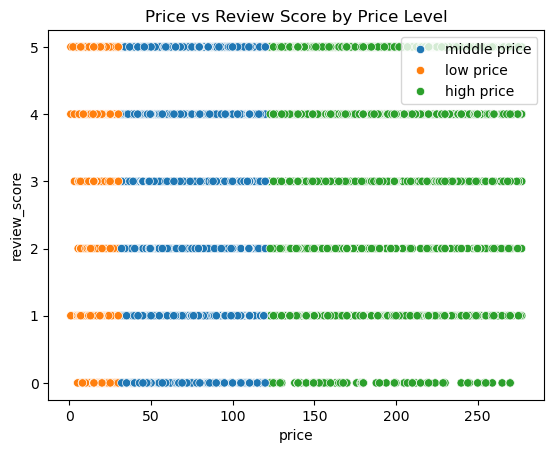

In [270]:
# Compare the price and review score by price level
fig9, ax = plt.subplots()
sns.scatterplot(x='price', y='review_score', hue='price_level', data=df_sales_cust_sub)
plt.legend(loc='upper right')  # Specify a location to speed up plotting
plt.title('Price vs Review Score by Price Level')
fig9.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Update', 'cat_plot_score_shipdur.png'), bbox_inches='tight')

# Show the plot
plt.show()

__Comment:__ Each review score level contains data from all price levels. Which also comfirms that the price of the product does not have an impact on the review score.

In [272]:
# Export Visualization
fig9.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'cat_plot_score_shipdur.png'), bbox_inches='tight')

### 4.4 Regression Analysis

#### Hypothesis 1

- Hypothesis 1: If shipping time is higher, then the shipping duration is higher?

In [276]:
# Create separate objects

X = df_sales_cust_sub['shipping_time_days'].values.reshape(-1,1)
y = df_sales_cust_sub['shipping_duration_days'].values.reshape(-1,1)

In [277]:
# Show X values

X

array([[ 36.],
       [ 15.],
       [-40.],
       ...,
       [ -5.],
       [ -5.],
       [ -7.]])

In [278]:
# Show y values

y

array([[55.],
       [38.],
       [11.],
       ...,
       [ 1.],
       [ 1.],
       [-4.]])

In [279]:
# Split the data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [280]:
# Create a regression object

regression = LinearRegression () # This is the regression object, which will be fit onto the training set.

In [281]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [282]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

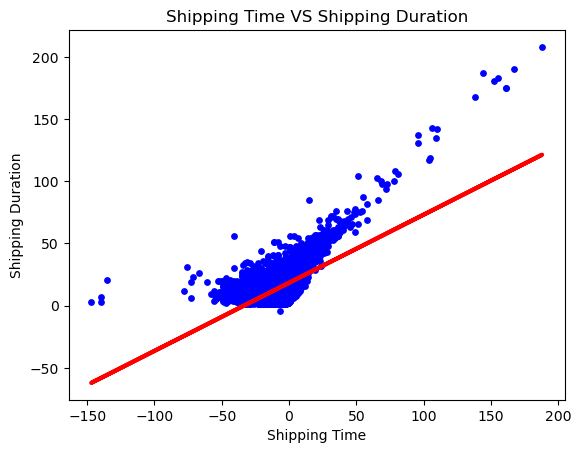

In [283]:
fig10 = plt
fig10.scatter(X_test, y_test, color='blue', s = 15)
fig10.plot(X_test, y_predicted, color='red', linewidth=3)
fig10.title('Shipping Time VS Shipping Duration')
fig10.xlabel('Shipping Time')
fig10.ylabel('Shipping Duration')
fig10.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'timevsduration.png'), bbox_inches='tight')
fig10.show()

__Interpretation on the fit of the regression model__: The first thing to notice is that the line covers a small amount of data points since most data points are gathered on a higher y-axis value as well as the huge cluster of points around the shipping time -50 - +50 days and shipping duration 0-50 days, the line shows a strong positive regression, which will be explored further later on.

#### Summary Statistics

In [286]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error which shows the average "distance" between the guesses made and the real answer.
r2 = r2_score(y_test, y_predicted) # This shows the percentage of the story the model can explain

In [287]:
# Print the model summary statistics.

print('Slope', regression.coef_) # shows how much y changes when X changes
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope [[0.54767425]]
Mean squared error:  52.993122100754796
R2 score:  0.37581095133318654


In [288]:
# Create a data frame comparing the real and the predicted values of y

df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_pred.head(20)

Actual  Predicted
0      6.0  10.707795
1     12.0  17.827561
2     14.0  10.160121
3      2.0   8.517098
4     45.0  32.067091
5     17.0  13.446167
6     12.0  15.089189
7      2.0  11.255470
8      4.0  12.898492
9     17.0  16.732212
10    10.0   8.517098
11    11.0  13.993841
12     7.0   9.064773
13    16.0   9.612447
14    24.0   9.612447
15     9.0  10.160121
16    12.0  15.089189
17     3.0  16.184538
18    11.0  -2.436387
19    10.0   9.064773

__Thought:__

- There is a positive relationship between shipping time and shipping duration, but the relationship is weak (R² = 0.38).
- MSE is quite high, meaning predictions deviate significantly from actual durations.
- Linear regression is not capturing the complexity of the data well, and the presence of negative predictions is a warning sign.
- Further investigation into other features (e.g., distance, product type, region) or trying a different model (e.g., decision trees, random forest) could improve predictive power.

#### Hypothesis 2

- Hypothesis 2: If the price is higher, then the freight value is higher?

In [292]:
# Create separate objects

X = df_sales_cust_sub['price'].values.reshape(-1,1)
y = df_sales_cust_sub['freight_value'].values.reshape(-1,1)

In [293]:
# Show X values

X

array([[ 44.99],
       [100.  ],
       [ 29.99],
       ...,
       [ 99.  ],
       [  6.9 ],
       [145.  ]])

In [294]:
# Show y values

y

array([[ 2.83],
       [ 9.34],
       [10.96],
       ...,
       [ 7.95],
       [ 7.39],
       [21.46]])

In [295]:
# Split the data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [296]:
# Create a regression object

regression = LinearRegression () # This is the regression object, which will be fit onto the training set.

In [297]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [298]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

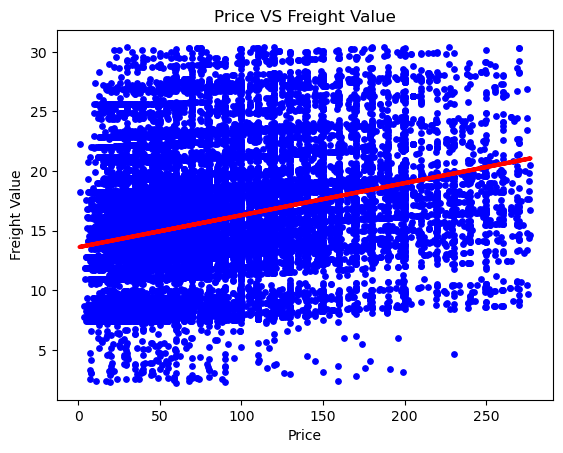

In [299]:
fig11 = plt
fig11.scatter(X_test, y_test, color='blue', s = 15)
fig11.plot(X_test, y_predicted, color='red', linewidth=3)
fig11.title('Price VS Freight Value')
fig11.xlabel('Price')
fig11.ylabel('Freight Value')
fig11.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'pricevsfreight.png'), bbox_inches='tight')
fig11.show()

__Interpretation on the fit of the regression model__: The line covers only points in the middle of the scatter plot. Reaching from freight value 13 to price 250. The line shows a positive regression.

#### Summary Statistics

In [302]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error which shows the average "distance" between the guesses made and the real answer.
r2 = r2_score(y_test, y_predicted) # This shows the percentage of the story the model can explain

In [303]:
# Print the model summary statistics.

print('Slope', regression.coef_) # shows how much y changes when X changes
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope [[0.02689807]]
Mean squared error:  23.888138358694906
R2 score:  0.08631687980438563


In [304]:
# Create a data frame comparing the real and the predicted values of y

df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_pred.head(20)

Actual  Predicted
0    27.30  16.034774
1    13.18  15.997385
2    16.73  15.470183
3     7.78  13.943717
4    16.37  19.800504
5    15.89  17.998602
6    12.32  15.966990
7    13.21  16.581611
8     8.23  17.377257
9    19.50  16.032353
10   15.42  14.824629
11   15.23  14.687449
12   18.65  15.712266
13   10.96  14.283978
14   24.72  15.897862
15   11.74  14.313566
16   13.37  14.956430
17    9.41  15.470183
18   20.83  15.090920
19   13.24  17.353048

__Thought:__

- Low predictive power: The R² score is quite low, indicating that "Price" alone is not a strong predictor of "Freight Value". There may be other important variables not included in the model.

- Potential improvements: You might want to include other variables, such as product category, shipping distance, or order size, to improve the model's accuracy. Alternatively, exploring more complex models could help capture any non-linear relationships.

#### Hypothesis 3

- Hypothesis 3: If the estimated duration is higher, then the freight value is higher?

In [308]:
# Create separate objects

X = df_sales_cust_sub['estimated_duration_days'].values.reshape(-1,1)
y = df_sales_cust_sub['freight_value'].values.reshape(-1,1)

In [309]:
# Show X values

X

array([[19.],
       [23.],
       [51.],
       ...,
       [ 6.],
       [ 6.],
       [ 3.]])

In [310]:
# Show y values

y

array([[ 2.83],
       [ 9.34],
       [10.96],
       ...,
       [ 7.95],
       [ 7.39],
       [21.46]])

In [311]:
# Split the data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [312]:
# Create a regression object

regression = LinearRegression () # This is the regression object, which will be fit onto the training set.

In [313]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [314]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

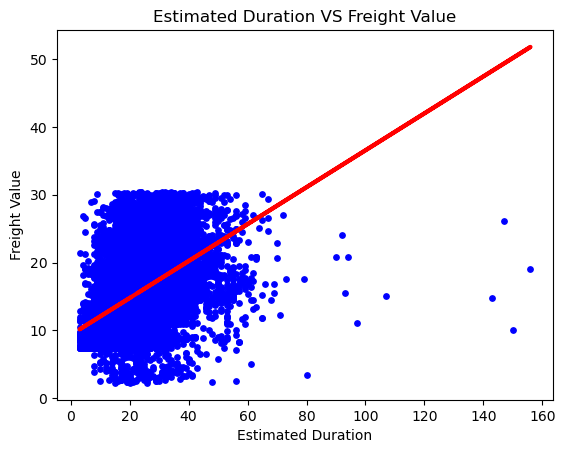

In [315]:
fig12 = plt
fig12.scatter(X_test, y_test, color='blue', s = 15)
fig12.plot(X_test, y_predicted, color='red', linewidth=3)
fig12.title('Estimated Duration VS Freight Value')
fig12.xlabel('Estimated Duration')
fig12.ylabel('Freight Value')
fig12.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'estivsduration.png'), bbox_inches='tight')
fig12.show()

__Interpretation on the fit of the regression model__: The line covers many points of the cluster. But looking at the statistic summary will show a better picture for interpretation.

#### Summary Statistics

In [318]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error which shows the average "distance" between the guesses made and the real answer.
r2 = r2_score(y_test, y_predicted) # This shows the percentage of the story the model can explain

In [319]:
# Print the model summary statistics.

print('Slope', regression.coef_) # shows how much y changes when X changes
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope [[0.27234888]]
Mean squared error:  20.695683638407996
R2 score:  0.20842317147584433


In [320]:
# Create a data frame comparing the real and the predicted values of y

df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_pred.head(20)

Actual  Predicted
0    27.30  14.769862
1    13.18  12.863420
2    16.73  17.221002
3     7.78  14.769862
4    16.37  14.769862
5    15.89  16.403955
6    12.32  14.225164
7    13.21  13.408117
8     8.23  13.135769
9    19.50  14.769862
10   15.42  16.948653
11   15.23  14.497513
12   18.65  15.859257
13   10.96  18.038048
14   24.72  20.216839
15   11.74  15.859257
16   13.37  14.225164
17    9.41  11.229326
18   20.83  22.667979
19   13.24  16.676304

__Thought:__

- Modest predictive power: The R² score of 0.208 is still low, suggesting that Estimated Duration Days has a weak relationship with Freight Value on its own. The model might benefit from incorporating additional variables to improve its accuracy.


### 4.5 Clustering Analysis

In [323]:
# Check for missing values before going into the clustering analysis
df_sales_cust_sub.isnull().sum()

date_ordinal                0
qty                         0
price                       0
freight_value               0
product_photos_qty          0
product_weight_g            0
review_score                0
shipping_time_days          0
shipping_duration_days      0
estimated_duration_days     0
duration_level              0
price_level                18
dtype: int64

In [324]:
df_sales_cust_sub.dtypes

date_ordinal                 int64
qty                          int64
price                      float64
freight_value              float64
product_photos_qty           int64
product_weight_g             int64
review_score               float64
shipping_time_days         float64
shipping_duration_days     float64
estimated_duration_days    float64
duration_level              object
price_level                 object
dtype: object

In [325]:
# Drop the durtaion level column for the standardizing process

df_sales_std = df_sales_cust_sub.drop(columns=['duration_level','price_level','date_ordinal','qty','product_photos_qty','product_weight_g', ])

In [326]:
df_sales_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    85579 non-null  float64
 1   freight_value            85579 non-null  float64
 2   review_score             85579 non-null  float64
 3   shipping_time_days       85579 non-null  float64
 4   shipping_duration_days   85579 non-null  float64
 5   estimated_duration_days  85579 non-null  float64
dtypes: float64(6)
memory usage: 3.9 MB


### Standardize the Dataset

In [328]:
# Create a scaler object
scaler = StandardScaler ()

# Fit and transform the numeric columns
data_standardized = scaler.fit_transform(df_sales_std)

# Convert back to a DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=df_sales_std.columns)

In [329]:
# Show the standardized table
data_standardized

price  freight_value  review_score  shipping_time_days  \
0     -0.635378      -2.543759     -2.218743            4.799566   
1      0.339876      -1.266434     -2.218743            2.694169   
2     -0.901308      -0.948575      0.678010           -2.819967   
3     -1.044733       0.273811     -0.046178            0.087486   
4     -1.051825      -0.330515     -2.218743           -0.514056   
...         ...            ...           ...                 ...   
85574  0.515390      -1.231117      0.678010            0.689028   
85575 -0.300129      -1.293904     -2.218743            0.789285   
85576  0.322148      -1.539166     -2.218743            0.689028   
85577 -1.310664      -1.649043      0.678010            0.689028   
85578  1.137667       1.111626     -2.218743            0.488514   

       shipping_duration_days  estimated_duration_days  
0                    4.746970                -0.556839  
1                    2.875865                -0.087313  
2                   -0.095891                 3.199369  
3                    1.334955                 1.321265  
4                    2.655735                 3.434132  
...                       ...                      ...  
85574               -1.196541                -2.082799  
85575               -1.196541                -2.200180  
85576               -1.196541                -2.082799  
85577               -1.196541                -2.082799  
85578               -1.746866                -2.434943  

[85579 rows x 6 columns]

### Apply the Elbow-Technique

In [331]:
# Applying the Elbow Technique

num_cl = range (1,10) # Define the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusterts in the range assigned above

In [332]:
score = [kmeans[i].fit(data_standardized).score(data_standardized) for i in range(len(kmeans))] # Creates score that represents a rate of variation for the given cluster option.

score

[-513474.0000000005,
 -414522.67537501577,
 -340181.93132063467,
 -298261.93465698475,
 -270367.89393731416,
 -254216.8061062374,
 -222386.7544962751,
 -208297.2835154559,
 -195377.1938196021]

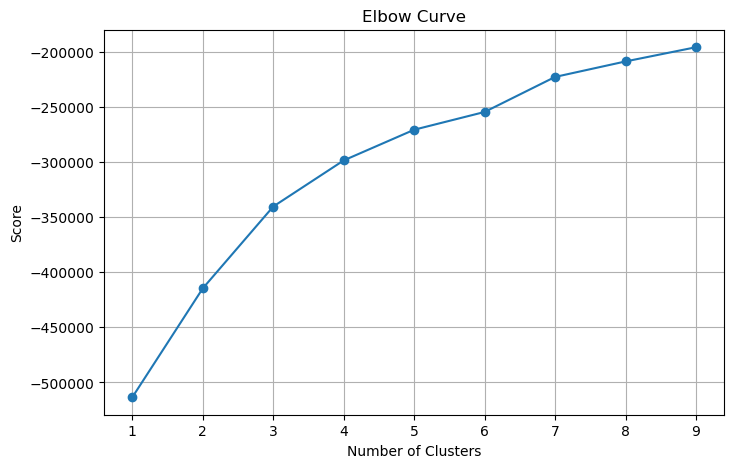

In [333]:
# Plot the Elbow Technique

fig13 = plt
fig13.figure(figsize=(8, 5))  # Optional: Adjust the figure size
fig13.plot(num_cl, score, marker='o', linestyle='-')  # Use markers for better visibility
fig13.xlabel('Number of Clusters')
fig13.ylabel('Score')
fig13.title('Elbow Curve')
fig13.grid(True)  # Optional: Add grid lines for better readability
fig13.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'elbowcurve.png'), bbox_inches='tight')
fig13.show()

### K-Means Clustering

In [335]:
# Create the k-means object.

kmeans = KMeans (n_clusters = 3)

In [336]:
# Fit the k-means object to the data

kmeans.fit(data_standardized)

KMeans(n_clusters=3)

In [337]:
# Create a new column for the "clusters" to be shown

data_standardized['clusters'] = kmeans.fit_predict(data_standardized)

In [338]:
# Show the data frame with the new "clusters" column

data_standardized.head()

price  freight_value  review_score  shipping_time_days  \
0 -0.635378      -2.543759     -2.218743            4.799566   
1  0.339876      -1.266434     -2.218743            2.694169   
2 -0.901308      -0.948575      0.678010           -2.819967   
3 -1.044733       0.273811     -0.046178            0.087486   
4 -1.051825      -0.330515     -2.218743           -0.514056   

   shipping_duration_days  estimated_duration_days  clusters  
0                4.746970                -0.556839         1  
1                2.875865                -0.087313         1  
2               -0.095891                 3.199369         0  
3                1.334955                 1.321265         0  
4                2.655735                 3.434132         1

In [339]:
# Show the number of clusters in the data set

data_standardized['clusters'].value_counts()

clusters
2    40064
0    36965
1     8550
Name: count, dtype: int64

### Visualizations of clusters

#### Shipping Days and Shipping Duration

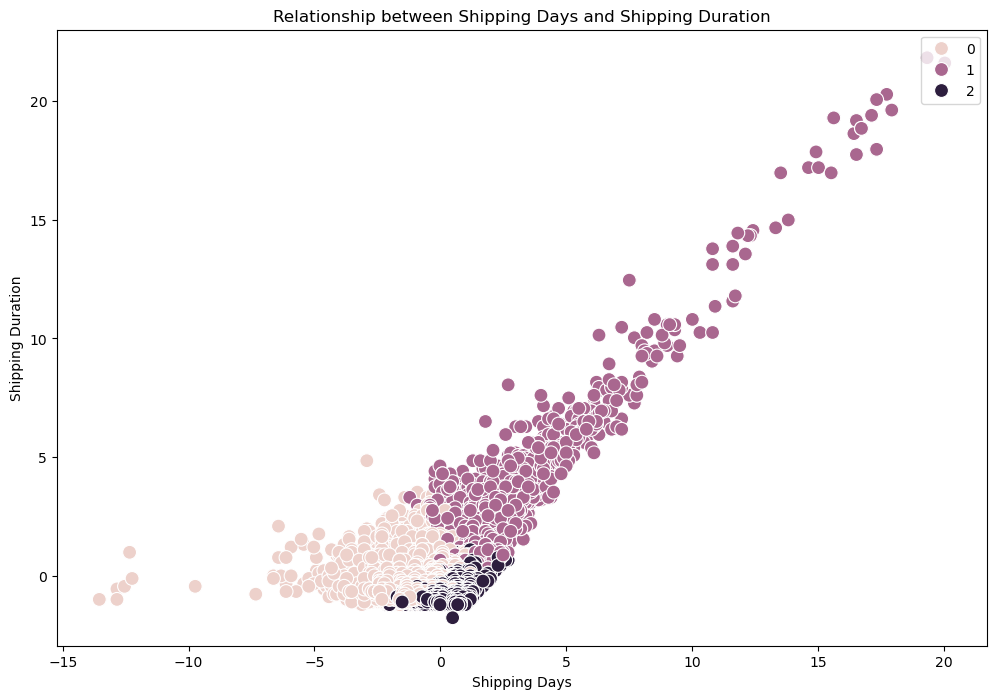

In [342]:
# Plot the clusters for the "shipping time" and "shipping duration" variables

fig14 = plt
fig14.figure (figsize=(12,8))
ax = sns.scatterplot(x=data_standardized['shipping_time_days'], y=data_standardized['shipping_duration_days'], hue=kmeans.labels_, s=100)

ax.legend(loc='upper right')
ax.grid(False)
fig14.title('Relationship between Shipping Days and Shipping Duration')
fig14.xlabel('Shipping Days')
fig14.ylabel('Shipping Duration')
fig14.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'cluster_shipping.png'), bbox_inches='tight')
fig14.show()

__Comment:__

#### Price and Freight Value

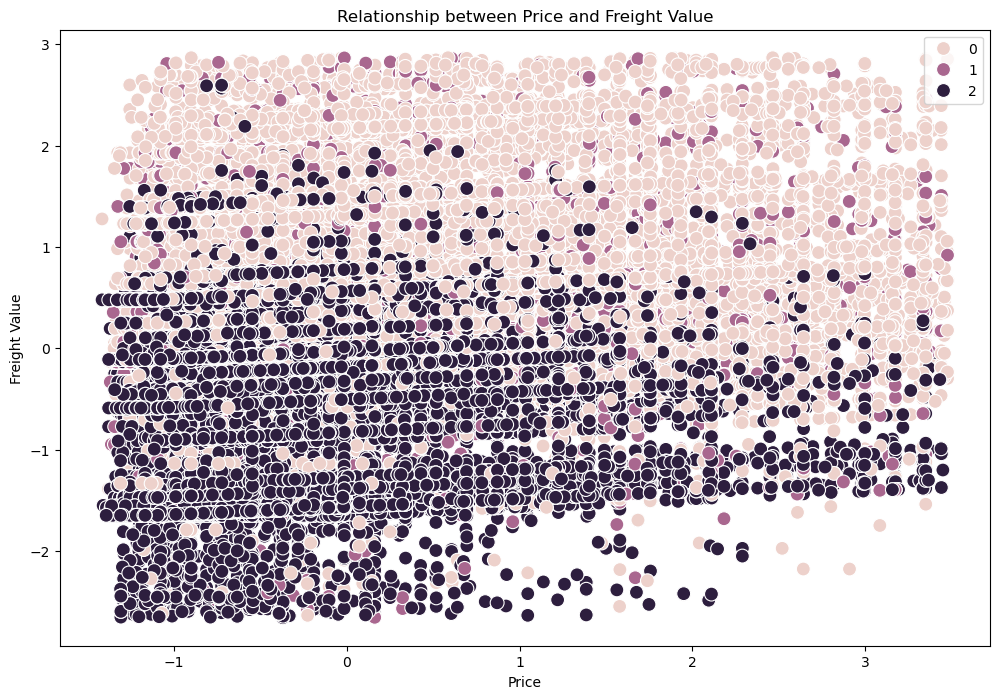

In [345]:
# Plot the clusters for the "price" and "freight value" variables

fig15 = plt
fig15.figure (figsize=(12,8))
ax = sns.scatterplot(x=data_standardized['price'], y=data_standardized['freight_value'], hue=kmeans.labels_, s=100)

ax.legend(loc='upper right')
ax.grid(False)
fig15.title('Relationship between Price and Freight Value')
fig15.xlabel('Price')
fig15.ylabel('Freight Value')
fig15.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'cluster_price_freight.png'), bbox_inches='tight')
fig15.show()

__Comment:__

#### Estimated Duration and Freight Value

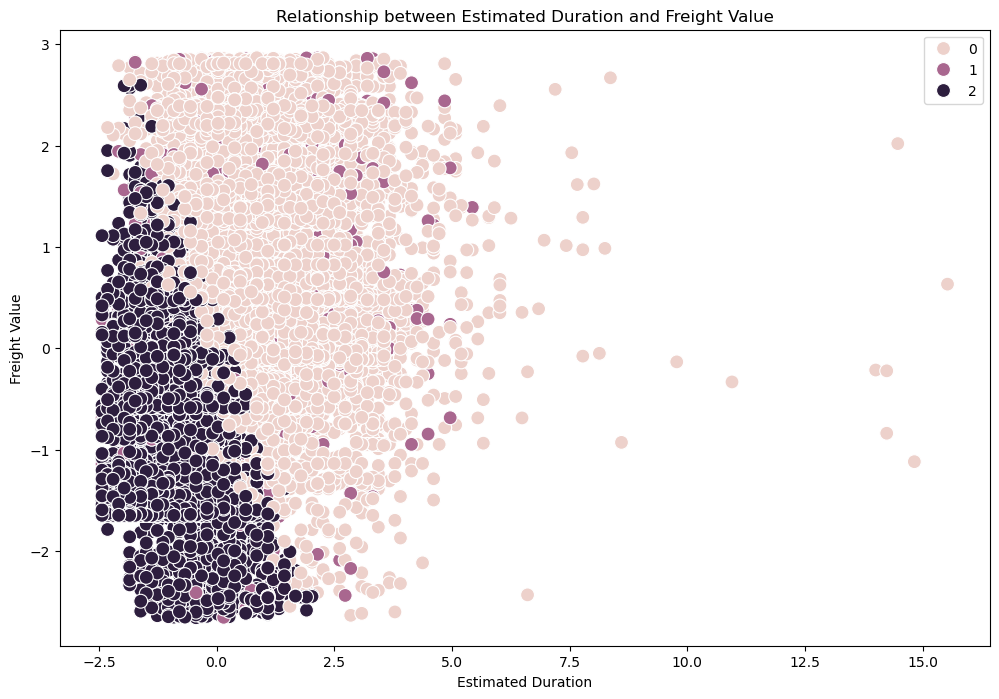

In [348]:
# Plot the clusters for the "estimated duration" and "freight value" variables

fig16 = plt
fig16.figure (figsize=(12,8))
ax = sns.scatterplot(x=data_standardized['estimated_duration_days'], y=data_standardized['freight_value'], hue=kmeans.labels_, s=100)

ax.legend(loc='upper right')
ax.grid(False)
fig16.title('Relationship between Estimated Duration and Freight Value')
fig16.xlabel('Estimated Duration')
fig16.ylabel('Freight Value')
fig16.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'cluster_esti_freight.png'), bbox_inches='tight')
fig16.show()

__Comment:__

### Calculating the descriptive statistics for the cluster

In [351]:
# Create a clusters column by assign the clusters to the color labels

data_standardized.loc[data_standardized['clusters'] == 2, 'cluster'] = 'dark purple'
data_standardized.loc[data_standardized['clusters'] == 1, 'cluster'] = 'purple'
data_standardized.loc[data_standardized['clusters'] == 0, 'cluster'] = 'pink'

In [352]:
data_standardized.groupby('cluster').agg({'price' :['mean', 'median'],
                                          'freight_value' :['mean', 'median'],
                                          'shipping_time_days' :['mean', 'median'],
                                          'shipping_duration_days' :['mean', 'median'],
                                          'estimated_duration_days' :['mean', 'median']})  

price           freight_value           shipping_time_days  \
                 mean    median          mean    median               mean   
cluster                                                                      
dark purple -0.347224 -0.548331     -0.673519 -0.597360           0.161626   
pink         0.361725  0.160817      0.646827  0.477869          -0.542840   
purple       0.063162 -0.193757      0.359521  0.236531           1.589559   

                      shipping_duration_days            \
               median                   mean    median   
cluster                                                  
dark purple  0.187743              -0.439956 -0.536151   
pink        -0.413799               0.029375 -0.095891   
purple       1.390828               1.934571  1.665150   

            estimated_duration_days            
                               mean    median  
cluster                                        
dark purple               -0.658434 -0.556839  
pink                       0.666888  0.499595  
purple                     0.202105  0.147450

__Comment:__ These results could improve the accuracy of the data interpretation because the data set has many entries that are overlapping and do not reveal the whole picture. The results could be used to make conclusions about customer behaviors that are not fully visible when looking at the visualizations. Those customer behaviors could be used to further investigate different customer profiles and pull informative recommendations for the stakeholders.

In [354]:
data_standardized

price  freight_value  review_score  shipping_time_days  \
0     -0.635378      -2.543759     -2.218743            4.799566   
1      0.339876      -1.266434     -2.218743            2.694169   
2     -0.901308      -0.948575      0.678010           -2.819967   
3     -1.044733       0.273811     -0.046178            0.087486   
4     -1.051825      -0.330515     -2.218743           -0.514056   
...         ...            ...           ...                 ...   
85574  0.515390      -1.231117      0.678010            0.689028   
85575 -0.300129      -1.293904     -2.218743            0.789285   
85576  0.322148      -1.539166     -2.218743            0.689028   
85577 -1.310664      -1.649043      0.678010            0.689028   
85578  1.137667       1.111626     -2.218743            0.488514   

       shipping_duration_days  estimated_duration_days  clusters      cluster  
0                    4.746970                -0.556839         1       purple  
1                    2.875865                -0.087313         1       purple  
2                   -0.095891                 3.199369         0         pink  
3                    1.334955                 1.321265         0         pink  
4                    2.655735                 3.434132         1       purple  
...                       ...                      ...       ...          ...  
85574               -1.196541                -2.082799         2  dark purple  
85575               -1.196541                -2.200180         2  dark purple  
85576               -1.196541                -2.082799         2  dark purple  
85577               -1.196541                -2.082799         2  dark purple  
85578               -1.746866                -2.434943         2  dark purple  

[85579 rows x 8 columns]

In [355]:
# Drop one cluster column

data_standardized = data_standardized.drop(columns='clusters')

In [356]:
data_standardized

price  freight_value  review_score  shipping_time_days  \
0     -0.635378      -2.543759     -2.218743            4.799566   
1      0.339876      -1.266434     -2.218743            2.694169   
2     -0.901308      -0.948575      0.678010           -2.819967   
3     -1.044733       0.273811     -0.046178            0.087486   
4     -1.051825      -0.330515     -2.218743           -0.514056   
...         ...            ...           ...                 ...   
85574  0.515390      -1.231117      0.678010            0.689028   
85575 -0.300129      -1.293904     -2.218743            0.789285   
85576  0.322148      -1.539166     -2.218743            0.689028   
85577 -1.310664      -1.649043      0.678010            0.689028   
85578  1.137667       1.111626     -2.218743            0.488514   

       shipping_duration_days  estimated_duration_days      cluster  
0                    4.746970                -0.556839       purple  
1                    2.875865                -0.087313       purple  
2                   -0.095891                 3.199369         pink  
3                    1.334955                 1.321265         pink  
4                    2.655735                 3.434132       purple  
...                       ...                      ...          ...  
85574               -1.196541                -2.082799  dark purple  
85575               -1.196541                -2.200180  dark purple  
85576               -1.196541                -2.082799  dark purple  
85577               -1.196541                -2.082799  dark purple  
85578               -1.746866                -2.434943  dark purple  

[85579 rows x 7 columns]

## 5. Time Series Analysis

#### Total Order Value in São Paulo

In [359]:
# Calculate Total Order Value

df_sales_cust['total_rev_order'] = df_sales_cust['price'] + df_sales_cust['freight_value']

In [360]:
# Check the dtype of the time component for the time series analysis

df_sales_cust['order_purchase_timestamp'].head(5)

0   2016-09-15
1   2016-10-02
2   2016-10-03
3   2016-10-03
4   2016-10-03
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [361]:
# Subset the DataFrame by state, date, and total_order_value

df_time_series = df_sales_cust[
    (df_sales_cust['order_purchase_timestamp'] >= '2016-01-01') & 
    (df_sales_cust['customer_state'] == 'SP')
][['order_purchase_timestamp', 'customer_state', 'total_rev_order']]

In [362]:
# Check the df_time_series frame
df_time_series

order_purchase_timestamp customer_state  total_rev_order
0                   2016-09-15             SP            47.82
1                   2016-10-02             SP           109.34
2                   2016-10-03             SP            40.95
7                   2016-10-03             SP            45.46
9                   2016-10-03             SP           133.46
...                        ...            ...              ...
85574               2018-08-29             SP           119.42
85575               2018-08-29             SP            73.10
85576               2018-08-29             SP           106.95
85577               2018-08-29             SP            14.29
85578               2018-09-03             SP           166.46

[38501 rows x 3 columns]

In [363]:
# Group by the date column for the time series analysis, this will set the order_purchase_timestamp to a new index as well.

df_time_series = df_time_series.groupby('order_purchase_timestamp').sum()

In [364]:
df_time_series

customer_state  \
order_purchase_timestamp                                                      
2016-09-15                                                               SP   
2016-10-02                                                               SP   
2016-10-03                                                           SPSPSP   
2016-10-04                 SPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSP   
2016-10-05                                           SPSPSPSPSPSPSPSPSPSPSP   
...                                                                     ...   
2018-08-26                SPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSP...   
2018-08-27                SPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSP...   
2018-08-28                SPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSPSP...   
2018-08-29                                               SPSPSPSPSPSPSPSPSP   
2018-09-03                                                               SP   

                          total_rev_order  
order_purchase_timestamp                   
2016-09-15                          47.82  
2016-10-02                         109.34  
2016-10-03                         219.87  
2016-10-04                        2856.86  
2016-10-05                         693.98  
...                                   ...  
2018-08-26                        4210.17  
2018-08-27                        3824.29  
2018-08-28                        2396.75  
2018-08-29                         792.65  
2018-09-03                         166.46  

[612 rows x 2 columns]

In [365]:
# Drop the Customer State column, since the filtering took place and is not needed anymore for the time series analysis

df_time_series.drop('customer_state', axis=1,inplace=True)

In [366]:
# Check for the drop
df_time_series.columns

Index(['total_rev_order'], dtype='object')

### 5.1 Create a Line Chart

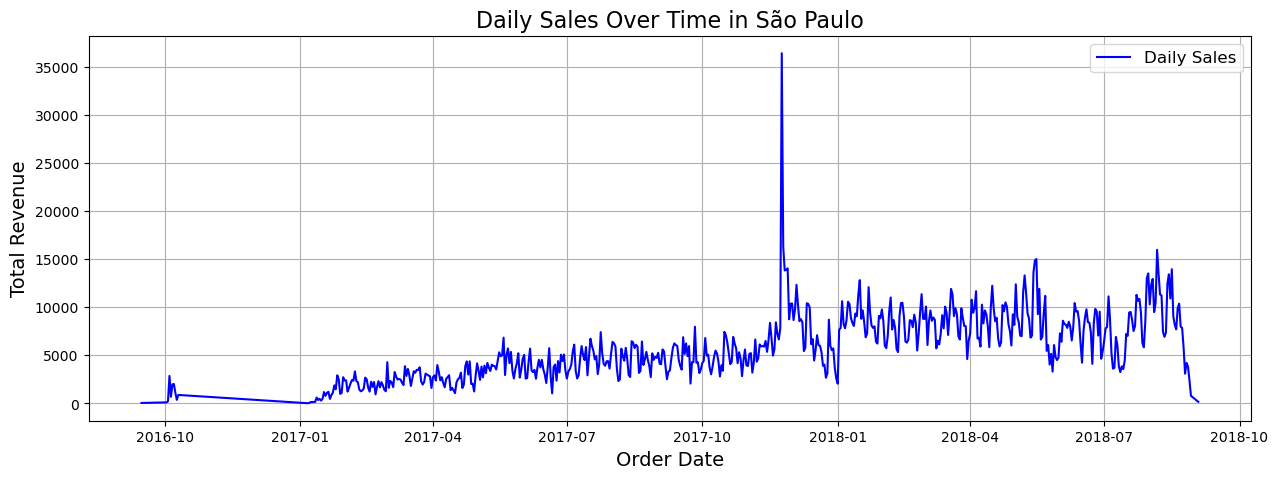

In [368]:
# Plot the daily sales data

fig17 = plt
fig17.figure(figsize=(15, 5), dpi=100)
fig17.plot(df_time_series.index, df_time_series['total_rev_order'], color='blue', label='Daily Sales')

# Add title and axis labels

fig17.title('Daily Sales Over Time in São Paulo', fontsize=16)  # Chart title
fig17.xlabel('Order Date', fontsize=14)           # X-axis title
fig17.ylabel('Total Revenue', fontsize=14)                # Y-axis title

# Add legend

fig17.legend(loc='upper right', fontsize=12)

# Export the plot
fig17.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'dailysales.png'), bbox_inches='tight')

# Display the plot
fig17.grid(visible=True)

### 5.2 Decompose the Data

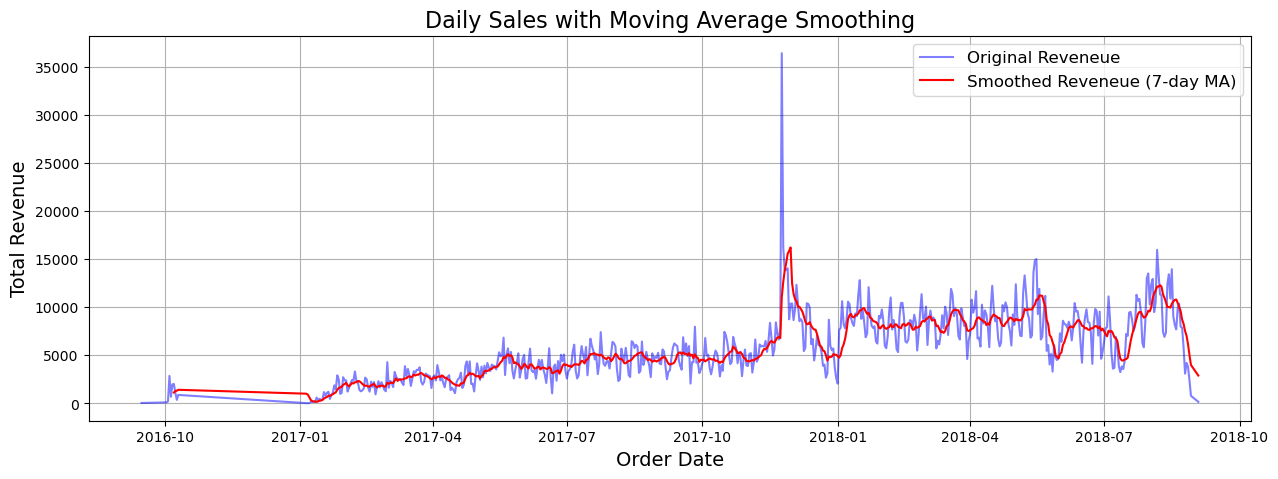

In [370]:
# Since the data was collected by seconds daily I will smooth the data to remove the extra noise in the data.

# Apply moving average smoothing with a window size (e.g., 7 days for weekly smoothing)

df_time_series['smoothed_order_value'] = df_time_series['total_rev_order'].rolling(window=7, center=False).mean()

# Plot the original and smoothed data

fig18 = plt
fig18.figure(figsize=(15, 5), dpi=100)
fig18.plot(df_time_series.index, df_time_series['total_rev_order'], label='Original Reveneue', color='blue', alpha=0.5)
fig18.plot(df_time_series.index, df_time_series['smoothed_order_value'], label='Smoothed Reveneue (7-day MA)', color='red')
fig18.title('Daily Sales with Moving Average Smoothing', fontsize=16)
fig18.xlabel('Order Date', fontsize=14)
fig18.ylabel('Total Revenue', fontsize=14)
fig18.legend(fontsize=12)
fig18.grid(visible=True)
fig18.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'dailysales_smooth.png'), bbox_inches='tight')
fig18.show()

In [371]:
# Check the frequency of the order_date index, and ensure there are no gaps between the order dates to have a suitable data set for the time series analysis.

frequency = pd.infer_freq(df_time_series.index)
print(f"Detected Frequency: {frequency}")

Detected Frequency: None


In [372]:
# Create a daily frequency

df_time_series = df_time_series.asfreq('D')

In [373]:
# Interpolate the missing values

df_time_series['smoothed_order_value'] = df_time_series['smoothed_order_value'].interpolate(method='linear')

In [374]:
# Check for missing or NaN values

print(df_time_series['smoothed_order_value'].isnull().sum())

22


In [375]:
# Interpolation

df_time_series['smoothed_order_value'] = df_time_series['smoothed_order_value'].interpolate(method='linear')

In [376]:
# Check for missing or NaN values

print(df_time_series['smoothed_order_value'].isnull().sum())

22


In [377]:
# Remove rows

df_time_series.dropna(subset=['smoothed_order_value'], inplace=True)

In [378]:
# Check for missing or NaN values once more

print(df_time_series['smoothed_order_value'].isnull().sum())

0


In [379]:
# Check the frequency of the order_date index again
frequency = pd.infer_freq(df_time_series.index)
print(f"Detected Frequency: {frequency}")

Detected Frequency: D


In [380]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df_time_series['smoothed_order_value'],model='additive')

In [381]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

#### Time Series Decomposition - Plot

/var/folders/y8/whbdk63x63398jrksgc7pp0r0000gn/T/ipykernel_13228/921406962.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig19.show()


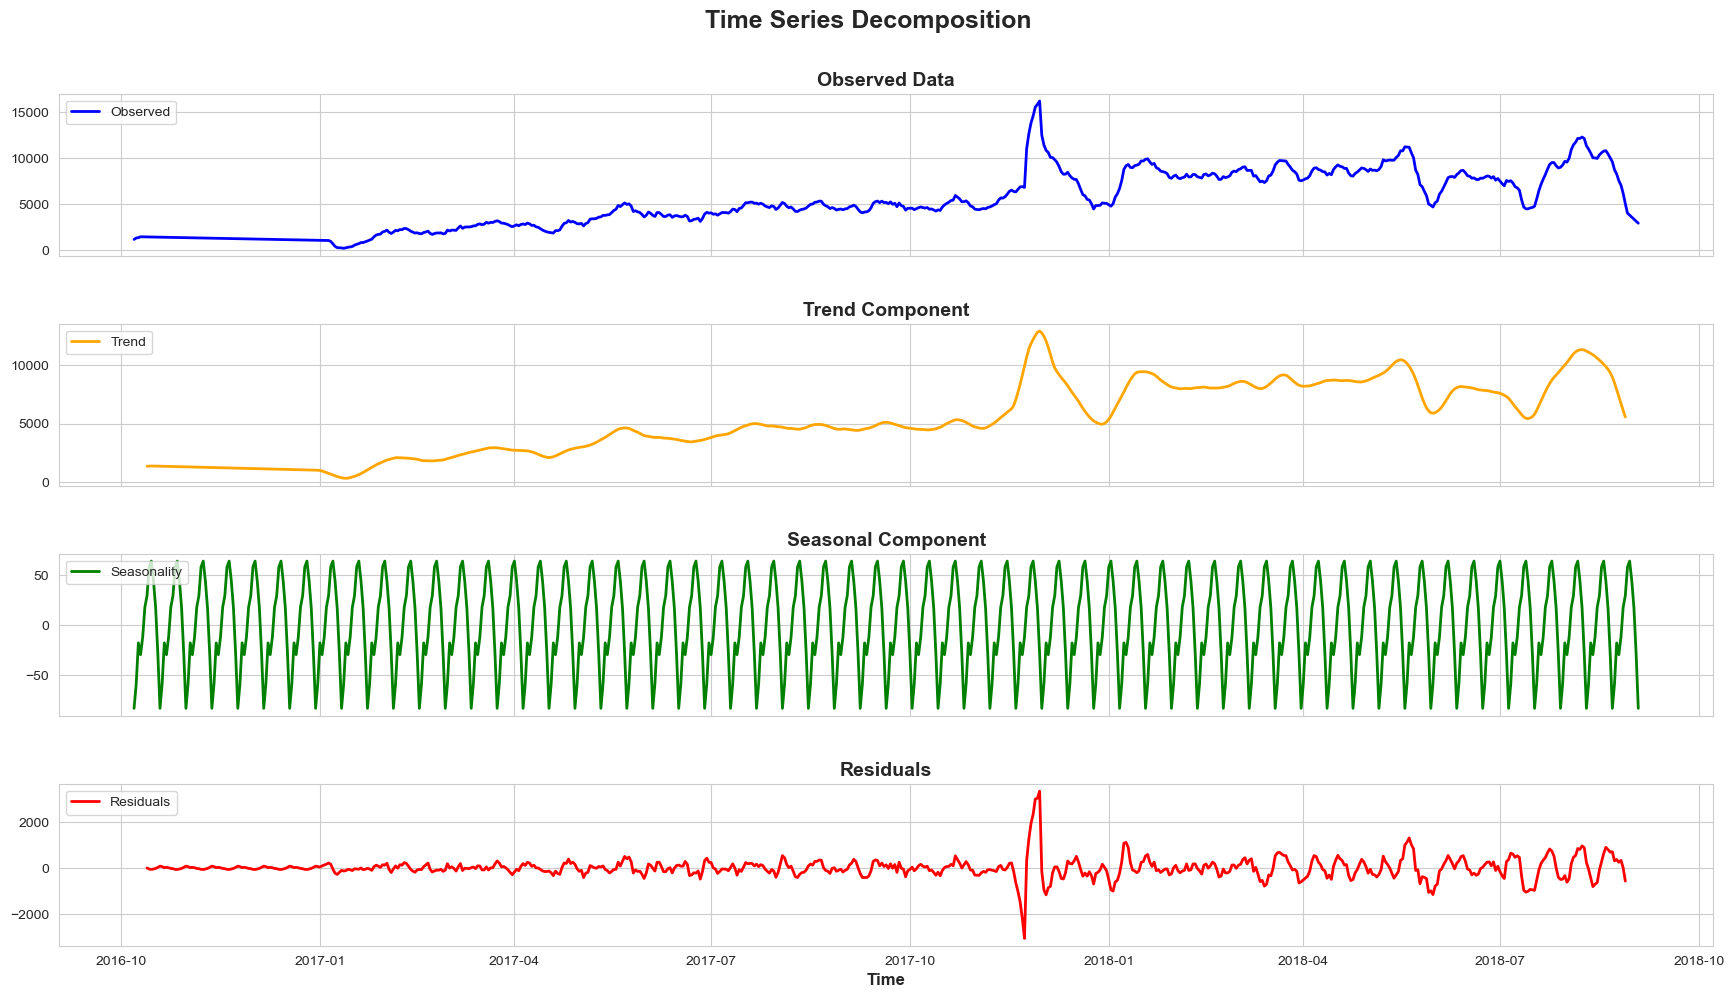

In [652]:
# Define figure size and style
rcParams['figure.figsize'] = 18, 10
sns.set_style("whitegrid")

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(
    df_time_series['smoothed_order_value'], 
    model='additive', 
    period=12  # Ensure you set a 'period' if your data is monthly or has a known seasonality
)

# Create a customized plot for the decomposition
fig19, axes = plt.subplots(4, 1, figsize=(18, 10), sharex=True)

# Plot the observed data
axes[0].plot(df_time_series.index, decomposition.observed, label='Observed', color='blue', linewidth=2)
axes[0].set_title('Observed Data', fontsize=14, weight='bold')
axes[0].legend(loc='upper left')

# Plot the trend component
axes[1].plot(df_time_series.index, decomposition.trend, label='Trend', color='orange', linewidth=2)
axes[1].set_title('Trend Component', fontsize=14, weight='bold')
axes[1].legend(loc='upper left')

# Plot the seasonal component
axes[2].plot(df_time_series.index, decomposition.seasonal, label='Seasonality', color='green', linewidth=2)
axes[2].set_title('Seasonal Component', fontsize=14, weight='bold')
axes[2].legend(loc='upper left')

# Plot the residuals
axes[3].plot(df_time_series.index, decomposition.resid, label='Residuals', color='red', linewidth=2)
axes[3].set_title('Residuals', fontsize=14, weight='bold')
axes[3].legend(loc='upper left')

# Label the shared x-axis
axes[3].set_xlabel('Time', fontsize=12, weight='bold')

# Adjust spacing between subplots
fig19.tight_layout(pad=3.0)

# Add an overall title
fig19.suptitle('Time Series Decomposition', fontsize=18, weight='bold', y=1.02)

#Export the plot
fig19.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'decomposition.png'), bbox_inches='tight')


# Show the plot
fig19.show()

#### Results:
- **Level**: The level component shows an upward trend with a strong peak during the end of 2017. Short-term variability may indicate seasonal effects or irregular spikes.
- **Trend**: The underlying trend shows a similar picture of sales increasing over time, with a peak in late 2017 and a decline in 2018, suggesting business or market changes have taken place during this time.
- **Seasonality**: Looking at the seasonal component, reveals a clear seasonal pattern. Further analysis is needed to determine weekly or monthly shopping cycles.
- **Residuals**: The graph of this component, shows no clear pattern which indicates a random distribution of the data points after removing the trend and seasonal component from the data set. The spikes around late 2017 could tell that some unexpected events happened.
- **Stationary**: The presence of a trend and seasonality implies the series is non-stationary, which requires a round of differencing the data.

### 5.3 Dickey-Fuller Stationary Test

In [654]:
from statsmodels.tsa.stattools import adfuller  # Import the adfuller() function

def dickey_fuller(timeseries):  # Define the function
    """
    Perform the Dickey-Fuller test on a given time series and print the results.
    """
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')  # Perform the test
    result = pd.Series(
        test[0:4],
        index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used']
    )
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)
    
# Apply the test using the function on the monthly sales time series
dickey_fuller(df_time_series['smoothed_order_value'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -2.186665
p-value                          0.211121
Number of Lags Used             20.000000
Number of Observations Used    676.000000
Critical Value (1%)             -3.440061
Critical Value (5%)             -2.865825
Critical Value (10%)            -2.569052
dtype: float64


### Interpretation

#### Hypothesis
- **Null Hypothesis**: The null hypothesis series has a **unit root**, which means the data is non-stationary.
- **Alternative Hypothesis**: The alternative hypothesis series does **not have a unit root**, which means the data is stationary.

#### Interpretation
- The test statistic of -2.186665 is **more than** the critical values 5% and 10%, which are more critical to the interpretation than 1% value. This means the null hypothesis can not be rejected at this point of the analysis.
- The p-value of 0.211121 is **bigger** than the threshold of 0.05, another indicator for not rejecting the null hypothesis.

#### Findings
- The null hypothesis can not be rejected yet, since the p-value is above the threshold and the test statistic is more than all the critical values.
- The time series has a **unit root** and is **non-stationary**

#### Insights
- The decomposition plot and dickey-fuller test both support that the data is **non-stationary**.

#### Next Steps
- Conduct a round of differencing the data to become stationary and run the dickey-fuller test again.

### 5.4 Stationarizing the data

In [656]:
# First round of stationarizing the data
df_diff = df_time_series['smoothed_order_value'] - df_time_series['smoothed_order_value'].shift(1)

# Drop NaN values caused by the shift
df_diff.dropna(inplace=True)

# Check the first few rows of the differenced series
print(df_diff.head())

order_purchase_timestamp
2016-10-08    153.118571
2016-10-09     37.167143
2016-10-10     94.715714
2016-10-11     -4.650969
2016-10-12     -4.650969
Freq: D, Name: smoothed_order_value, dtype: float64


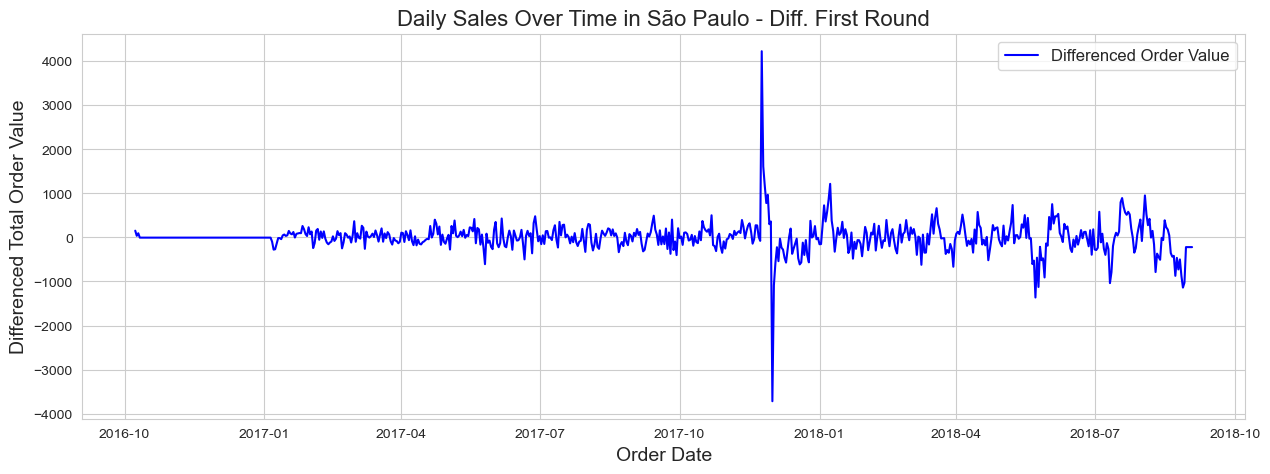

In [658]:
# Plot the daily sales data after the first round of differencing

fig20 = plt
fig20.figure(figsize=(15, 5), dpi=100)
fig20.plot(df_diff, label='Differenced Order Value', color='blue')

# Add title and axis labels

fig20.title('Daily Sales Over Time in São Paulo - Diff. First Round', fontsize=16)  # Chart title
fig20.xlabel('Order Date', fontsize=14)           # X-axis title
fig20.ylabel('Differenced Total Order Value', fontsize=14)                # Y-axis title

# Add legend

fig20.legend(loc='upper right', fontsize=12)

# Export the plot
fig20.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'dailysales_diff.png'), bbox_inches='tight')

# Display the plot

fig20.grid(visible=True)

In [660]:
# Conducting the Dickey-Fuller Test again
dickey_fuller(df_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                -7.286078e+00
p-value                        1.457697e-10
Number of Lags Used            2.000000e+01
Number of Observations Used    6.750000e+02
Critical Value (1%)           -3.440075e+00
Critical Value (5%)           -2.865831e+00
Critical Value (10%)          -2.569055e+00
dtype: float64


### Interpretation

#### Hypothesis
- **Null Hypothesis**: The null hypothesis series has a **unit root**, which means the data is non-stationary.
- **Alternative Hypothesis**: The alternative hypothesis series does **not have a unit root**, which means the data is stationary

#### Interpretation
- The test statistic of - 7.286078 is **less than** all the critical values. This means the null hypothesis can be rejected now.
- The p-value of  0.00000000145 is **much smaller** than the threshold of 0.05, another indicator of the null hypothesis can be rejected now

#### Findings
- The null hypothesis can be rejected since the p-value is below the threshold and the test statistic is much less than all the critical values.
- The time series has **no unit root** and is **stationary** now.

#### Insights
- The decomposition plot and dickey-fuller test both support that the data is **stationary** and I can reject the null hypothesis at this point.

### 5.5 Autocorrelation

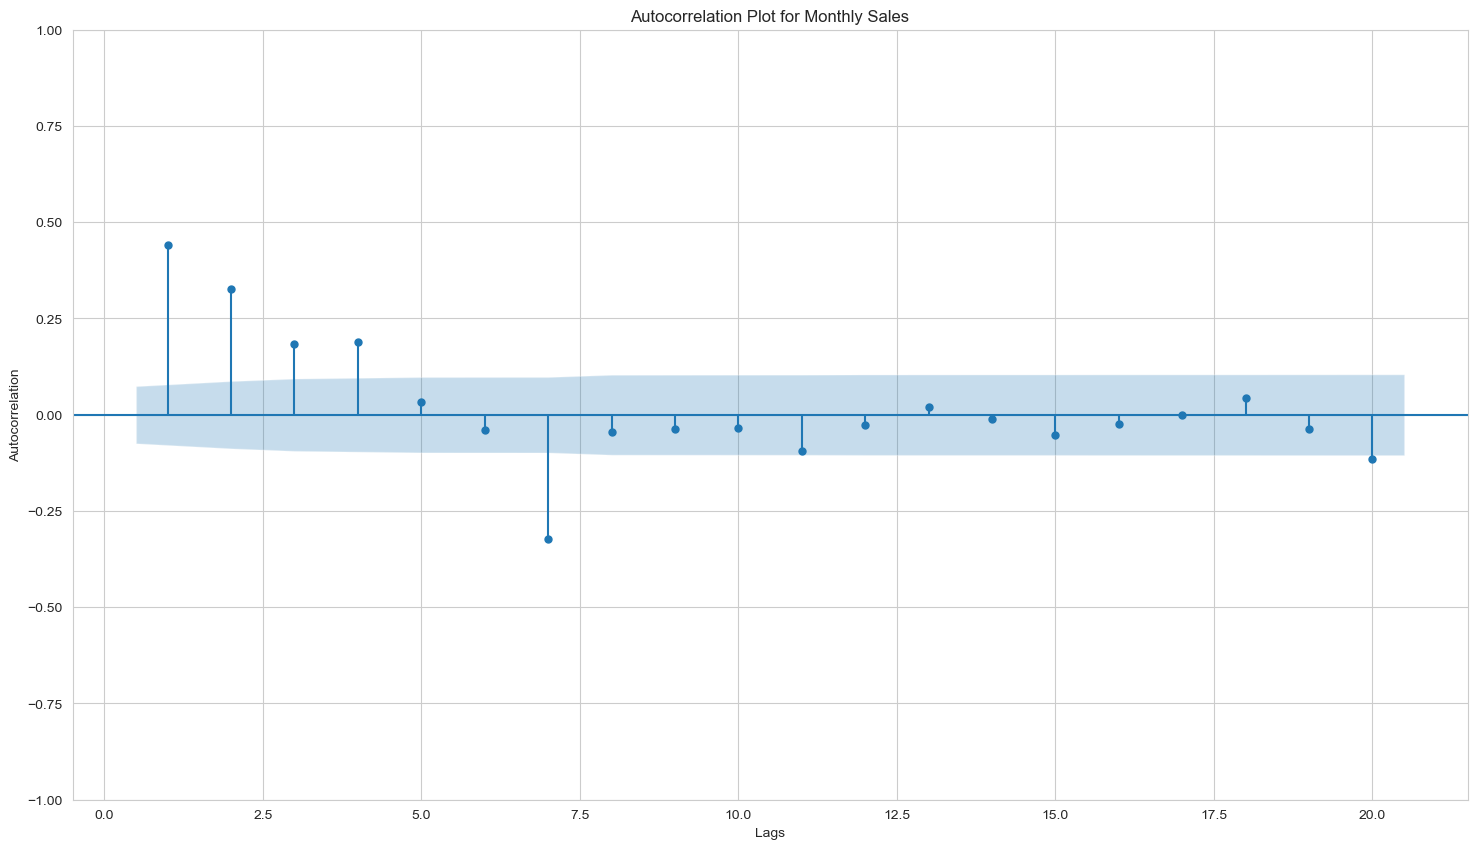

In [662]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Import the autocorrelation and partial autocorrelation plots
import matplotlib.pyplot as plt

# Plot the autocorrelation for the monthly sales data
fig21 = plt
plot_acf(df_diff, lags=20, zero=False)  # Adjust the number of lags as necessary
fig21.title('Autocorrelation Plot for Monthly Sales')
fig21.xlabel('Lags')
fig21.ylabel('Autocorrelation')
fig21.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'autocorrelation.png'), bbox_inches='tight')
fig21.show()

#### Interpretation

- Most of the lags are below the blue edge of the confidence level, which supports the result of the dickey-fuller test: "the data being stationary after the differencing process".

## 6. Business Questions

In [ ]:
# Check the dataset for answering the business questions
df_sales_cust.info()

### 6.1 Revenue Analysis
- 1. Average revenue per order across product categories

In [ ]:
#Group data by product catecory name and calculate the average revenue
avg_rev_per_order = df_sales_cust.groupby('product_category_name_english')['total_rev_order'].mean().sort_values(ascending=False)
print(avg_rev_per_order.head(10))

#Plot the result in a bar chart
fig22 = plt
fig22.figure(figsize=(12, 6))
sns.barplot(x=avg_rev_per_order.index, y=avg_rev_per_order.values)
fig22.xticks(rotation=90)
fig22.title('Average Revenue per Order by Product Category')
fig22.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'rev_prod_cat.png'), bbox_inches='tight')
fig22.show()

- 2. Revenue across regions

In [ ]:
# Import ".json" file for the Brazil, as geolocation information

country_geo = r'/Users/daniel/Desktop/Ordner/Data Analyst/Data Analytics Course/Data Immersion/Achievement 6/Exercise 6.3/brazil_geo.json'

In [ ]:
#Group by customer state and sum the revenue
rev_by_region = df_sales_cust.groupby('customer_state')['total_rev_order'].sum().reset_index()
print(rev_by_region)

#Create a map showing the difference across the states
map1 = folium.Map(location=[-14.235, -51.9253], zoom_start=4)
folium.Choropleth(
    geo_data=country_geo,
    data=rev_by_region,
    columns=['customer_state', 'total_rev_order'],
    key_on='feature.id',
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="Total Revenue"
).add_to(map1)
folium.LayerControl().add_to(map1)
map1

In [ ]:
map1.save(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', "Total Revenue on State Level.html"), bbox_inches='tight')

__Insight:__ The highest revenue across Brazil is accounted in
1. São Paulo - with a total revenue of 3534861.50
2. Rio de Janeiro - with a total revenue of 1127145.03
3. Minas Gerais - with a total revenue of 1039629.78

### 6.2 Customer Segmentation Analysis
- 1. Where are customers with a high lifetime value located?

In [ ]:
# Step 1: Group by customer_unique_id to sum the total revenue per customer
customer_lifetime_value = df_sales_cust.groupby('customer_unique_id', as_index=False)['total_rev_order'].sum()

# Step 2: Group by customer_unique_id and customer_city to get unique combinations
location_data = df_sales_cust.groupby(['customer_unique_id', 'customer_city'], as_index=False).agg({
    'geolocation_lat': 'first',  # Assuming we want the first lat/lng for each customer-city combination
    'geolocation_lng': 'first'
})

# Step 3: Merge the aggregated revenue data with location data
merged = customer_lifetime_value.merge(location_data, on='customer_unique_id')

# Step 4: Get the top 10 high value customers
high_value_customers_10 = merged.nlargest(10, 'total_rev_order')

# Step 5: Print the top 10 high value customers
print(high_value_customers_10[['customer_unique_id', 'total_rev_order', 'customer_city']])

# Step 6: Create the map centered on Brazil
map2 = folium.Map(location=[-14.235, -51.9253], zoom_start=4)

# Step 7: Plot all customers' locations on the map
for _, row in merged.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(map2)

# Step 8: Highlight top 10 high value customers on the map
for _, row in high_value_customers_10.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.8
    ).add_to(map2)

# Step 9: Display the map
map2

In [ ]:
map2.save(os.path.join(path, '04 Analysis', 'Visualizations', 'Update', 'High_CLV_on_State_Level.html'))

__Insights:__ The customers with the highest lifetime value are based in
- 1. praia grande
- 2. niteroi
- 3. belo horizonte

- 2. What is the customer satifsfaction level?

review_score
0.0    0.007607
1.0    0.111301
2.0    0.032146
3.0    0.083221
4.0    0.190117
5.0    0.575609
Name: proportion, dtype: float64


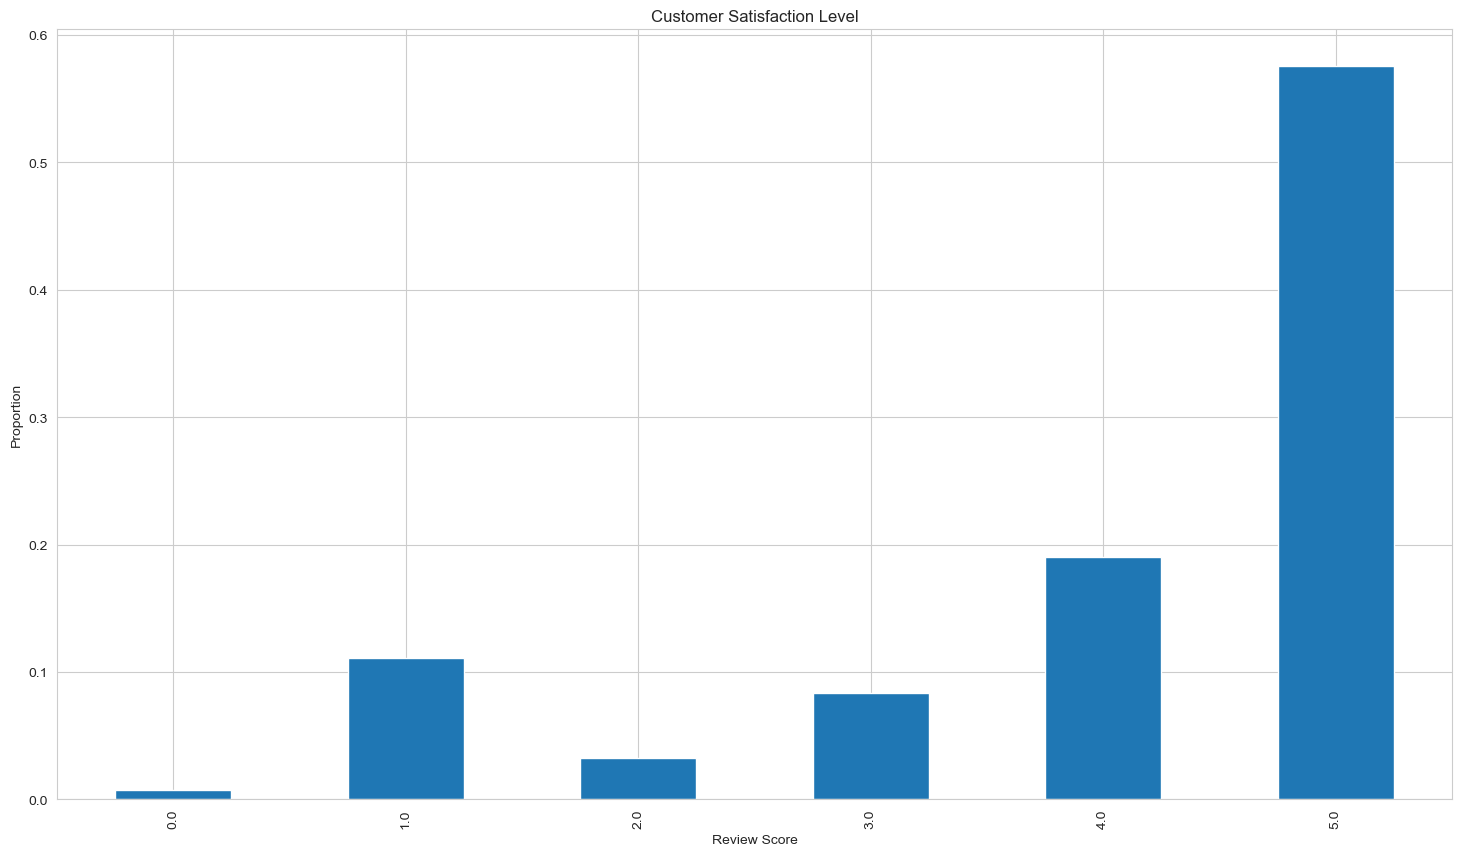

In [664]:
# Calculate the customer satisfaction level and plot a bar chart of the results

# Calculate the proportion of each review score
satisfaction_level = df_sales_cust['review_score'].value_counts(normalize=True).sort_index()
print(satisfaction_level)

# Plot the distribution
satisfaction_level.plot(kind='bar', title='Customer Satisfaction Level')

fig23 = plt
fig23.xlabel('Review Score')
fig23.ylabel('Proportion')
fig23.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'satisfaction_level.png'), bbox_inches='tight')
fig23.show()

In [668]:
# Step 1: Count total reviews
total_reviews = df_sales_cust['review_score'].count()

# Step 2: Count positive reviews (4+ stars)
positive_reviews = df_sales_cust[df_sales_cust['review_score'] >= 4]['review_score'].count()

# Step 3: Compute CSAT Score
csat_score = positive_reviews / total_reviews

print(f"Customer Satisfaction Score (CSAT): {csat_score:.2%}")

Customer Satisfaction Score (CSAT): 76.57%


__Insights:__ Review scores of 4 and 5 are given the most by all customers, which leads to satisfaction level of **76.57**%

- 3. Do customers who leave a higher review show higher loyalty?

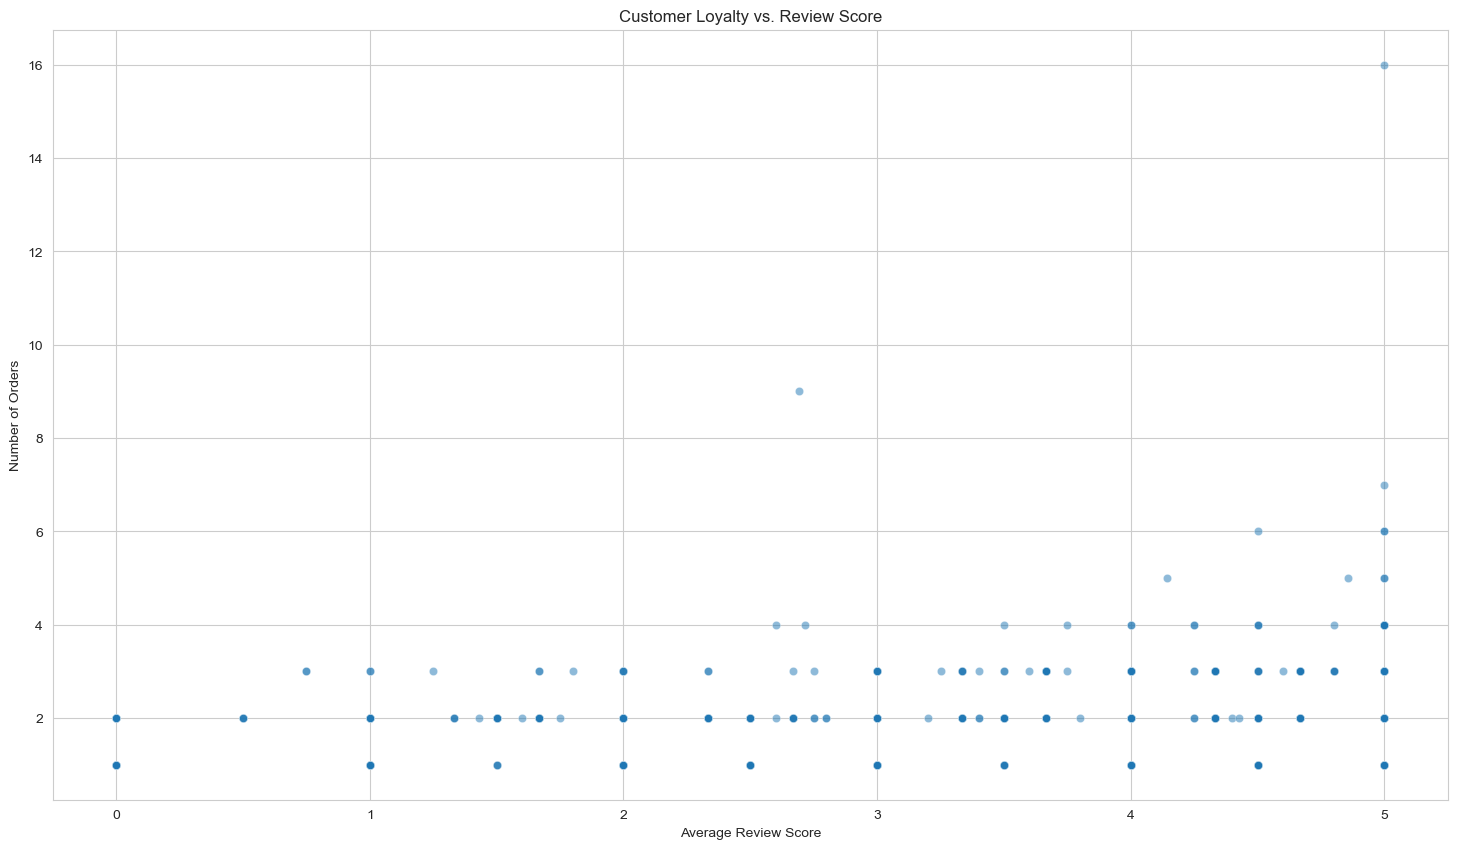

In [671]:
# Identify the loyalty of customers who leave a higher review

#Count the number of orders per customer
customer_order_counts = df_sales_cust.groupby('customer_unique_id')['order_id'].nunique().reset_index()

#Calculate the average review score per customer
review_avg = df_sales_cust.groupby('customer_unique_id')['review_score'].mean().reset_index()

#Merge the two calculations in one data set
loyalty_review = pd.merge(customer_order_counts, review_avg, on='customer_unique_id')

#Create a scatterplot of the review score and the order id
fig24 = plt
sns.scatterplot(x='review_score', y='order_id', data=loyalty_review, alpha=0.5)
fig24.title('Customer Loyalty vs. Review Score')
fig24.xlabel('Average Review Score')
fig24.ylabel('Number of Orders')
fig24.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'loyalty_review.png'), bbox_inches='tight')
fig24.show()

__Insights:__ It seems that customers which are giving an higher review score are also the most loyal. That can be oberserved by the increasing number of orders for each review score level.

### 6.3 Efficiency Analysis
- 1. How close are the actual delivery time and estimated delivery time?

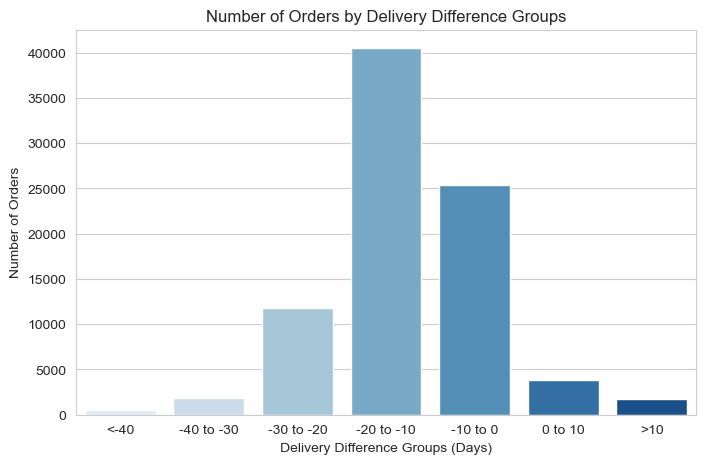

In [674]:
#Calculate the difference in days between order_delivered_customer_date and order_estimated_delivery_date
df_sales_cust['delivery_diff'] = (df_sales_cust['order_delivered_customer_date'] - df_sales_cust['order_estimated_delivery_date']).dt.days

# Create bins and corresponding labels for grouping
bins = [-np.inf, -40, -30, -20, -10, 0, 10, np.inf]
labels = ['<-40', '-40 to -30', '-30 to -20', '-20 to -10', '-10 to 0', '0 to 10', '>10']

# Create a new column 'delivery_diff_group' based on the bins
df_sales_cust['delivery_diff_group'] = pd.cut(df_sales_cust['delivery_diff'], bins=bins, labels=labels, right=True)

# Count the number of entries in each group
delivery_diff_group_counts = df_sales_cust['delivery_diff_group'].value_counts().sort_index()

# Plot the result

fig25 = plt
plt.figure(figsize=(8, 5))
sns.barplot(
    x=delivery_diff_group_counts.index,
    y=delivery_diff_group_counts.values,
    hue=delivery_diff_group_counts.index,  # Add hue based on the group
    palette="Blues",
    legend=False,  # Hide legend if not needed
)
fig25.title('Number of Orders by Delivery Difference Groups')
fig25.xlabel('Delivery Difference Groups (Days)')
fig25.ylabel('Number of Orders')
fig25.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'diff_delivery.png'), bbox_inches='tight')
fig25.show()

In [675]:
# Check how many orders are delivered on time based on the estimated delivery date
df_sales_cust["on_time"] = np.where(
    df_sales_cust["order_delivered_customer_date"]
    <= df_sales_cust["order_estimated_delivery_date"],
    1,
    0,
)

value_counts_df = df_sales_cust["on_time"].value_counts().reset_index()
value_counts_df.columns = ["on_time", "count"]

# Add percentage column
value_counts_df["percentage"] = (value_counts_df["count"] / df_sales_cust.shape[0]) * 100

print(value_counts_df)

   on_time  count  percentage
0        1  80073   93.566179
1        0   5506    6.433821


__Insights:__ 93% of all orders are on time. The most of those orders are even delivered before the estimated delivery date. Looking at the bar graph shows that the date of delivery is 10 to 20 days earlier than expected.

- 2. What is the impact of the freight value on the estimated delivery time?

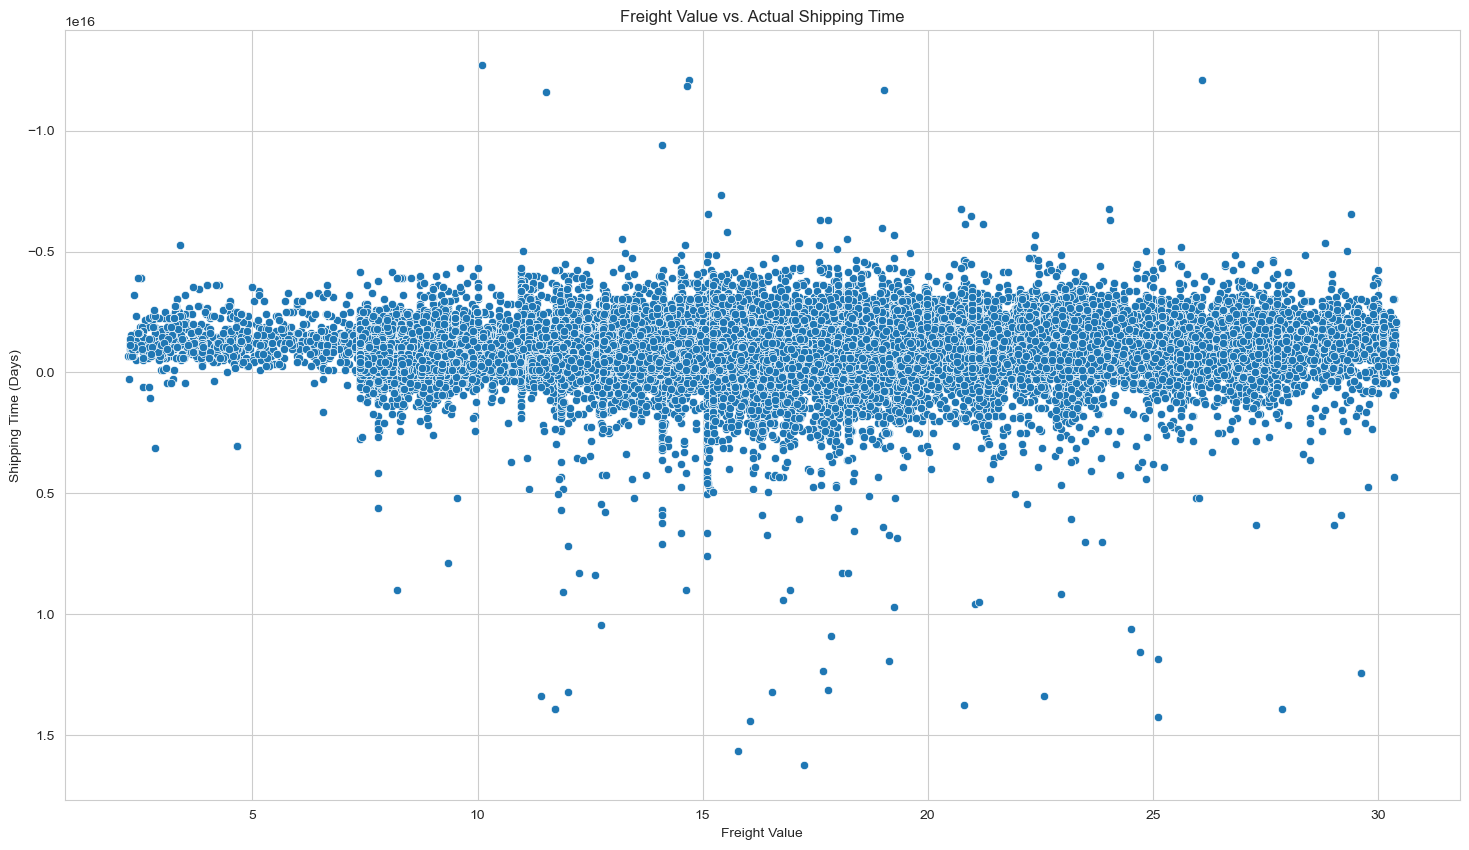

In [678]:
# Show the impact of freight value on shipping time

fig26 = plt
sns.scatterplot(x='freight_value', y='shipping_time', data=df_sales_cust)
fig26.title('Freight Value vs. Actual Shipping Time')
fig26.xlabel('Freight Value')
fig26.ylabel('Shipping Time (Days)')
fig26.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'freight_vs_shiptime.png'), bbox_inches='tight')
fig26.show()

__Insights:__ According to the scatterplot and previous created heatmap show no relationship between freight value and shipping time. That means that early shippings as well as delayed shipping are not impacted by the freight value of the items.

### 6.3 Product Analysis
- 1. What are the top 10 products in terms of total sales?

product_id                        product_category_name_english
99a4788cb24856965c36a24e339b6058  bed_bath_table                   47190.28
3dd2a17168ec895c781a9191c1e95ad7  computers_accessories            34575.24
e0d64dcfaa3b6db5c54ca298ae101d05  watches_gifts                    33724.13
aca2eb7d00ea1a7b8ebd4e68314663af  furniture_decor                  30438.97
f1c7f353075ce59d8a6f3cf58f419c9c  bed_bath_table                   28155.01
2b4609f8948be18874494203496bc318  health_beauty                    26174.20
5a848e4ab52fd5445cdc07aab1c40e48  bed_bath_table                   25474.59
7a10781637204d8d10485c71a6108a2e  watches_gifts                    24757.06
422879e10f46682990de24d770e7f83d  garden_tools                     22022.39
389d119b48cf3043d311335e499d9c6b  garden_tools                     20505.44
Name: total_rev_order, dtype: float64


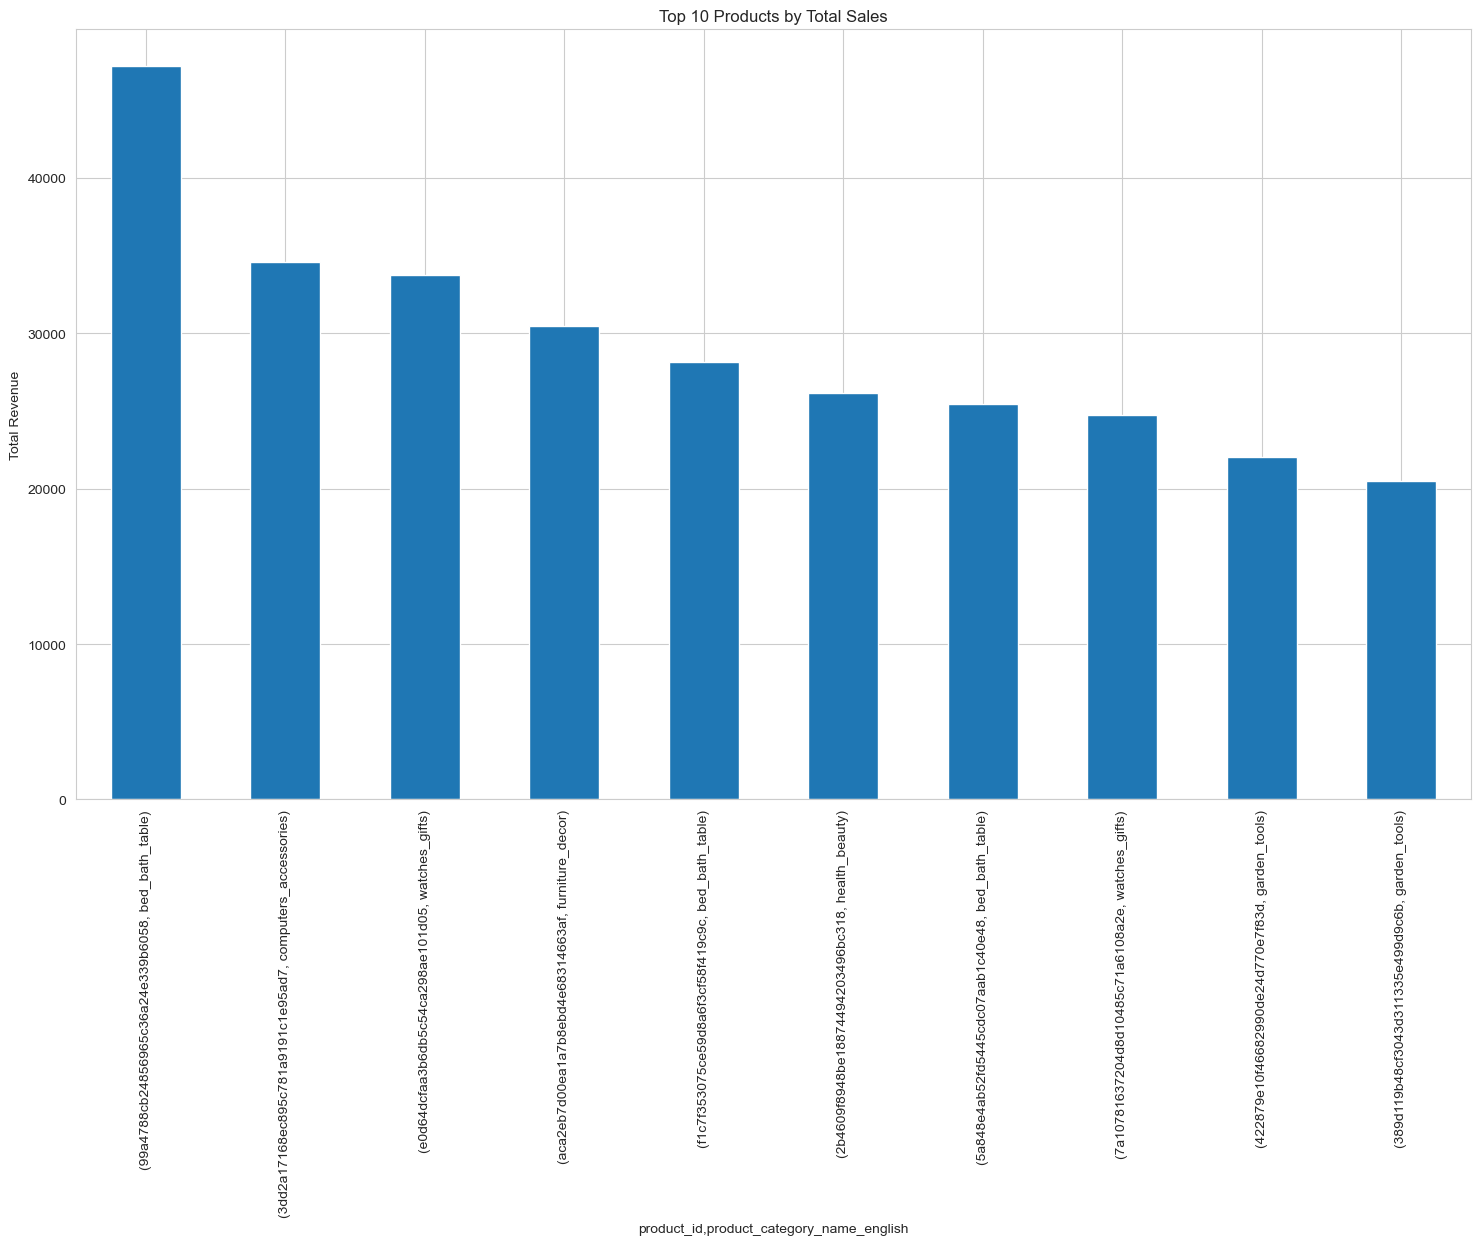

In [681]:
# Group the products by product id and sum up the total revenue per order
top_products = df_sales_cust.groupby(['product_id', 'product_category_name_english'])['total_rev_order'].sum().nlargest(10)

# Print the top products
print(top_products)

# Plot the top products
top_products.plot(kind='bar', title='Top 10 Products by Total Sales')

fig27 = plt
fig27.ylabel('Total Revenue')
fig27.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'top10_prod.png'), bbox_inches='tight')
fig27.show()

__Insights:__ The top ten products are 
1. 99a4788cb24856965c36a24e339b6058  **bed_bath_table** with a revenue of **47190.28**
2. 3dd2a17168ec895c781a9191c1e95ad7  **computers_accessories** with a revenue of **34575.24**
3. e0d64dcfaa3b6db5c54ca298ae101d05  **watches_gifts** with a revenue of **33724.13**
4. aca2eb7d00ea1a7b8ebd4e68314663af  **furniture_decor** with a revenue of **30438.97**
5. f1c7f353075ce59d8a6f3cf58f419c9c  **bed_bath_table** with a revenue of **28155.01**
6. 2b4609f8948be18874494203496bc318  **health_beauty** with a revenue of **26174.20**
7. 5a848e4ab52fd5445cdc07aab1c40e48  **bed_bath_table** with a revenue of **25474.59**
8. 7a10781637204d8d10485c71a6108a2e  **watches_gifts** with a revenue of **24757.06**
9. 422879e10f46682990de24d770e7f83d  **garden_tools** with a revenue of **22022.39**
10. 389d119b48cf3043d311335e499d9c6b  **garden_tools** with a revenue of **20505.44**

- 2. What are the top 10 products in terms of total quantity sales?

In [684]:
# Check the product category with the highest quantity sales
df_sales_cust.groupby("product_category_name_english").agg({"qty": "sum"}).sort_values(
    by="qty", ascending=False
)

qty
product_category_name_english           
bed_bath_table                     11810
health_beauty                       8084
sports_leisure                      7594
furniture_decor                     7088
computers_accessories               6773
...                                  ...
la_cuisine                            10
fashion_childrens_clothes              8
furniture_mattress_and_upholstery      7
security_and_services                  2
computers                              1

[71 rows x 1 columns]

/var/folders/y8/whbdk63x63398jrksgc7pp0r0000gn/T/ipykernel_13228/1410878892.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


                                 qty
product_category_name_english       
bed_bath_table                 11810
health_beauty                   8084
sports_leisure                  7594


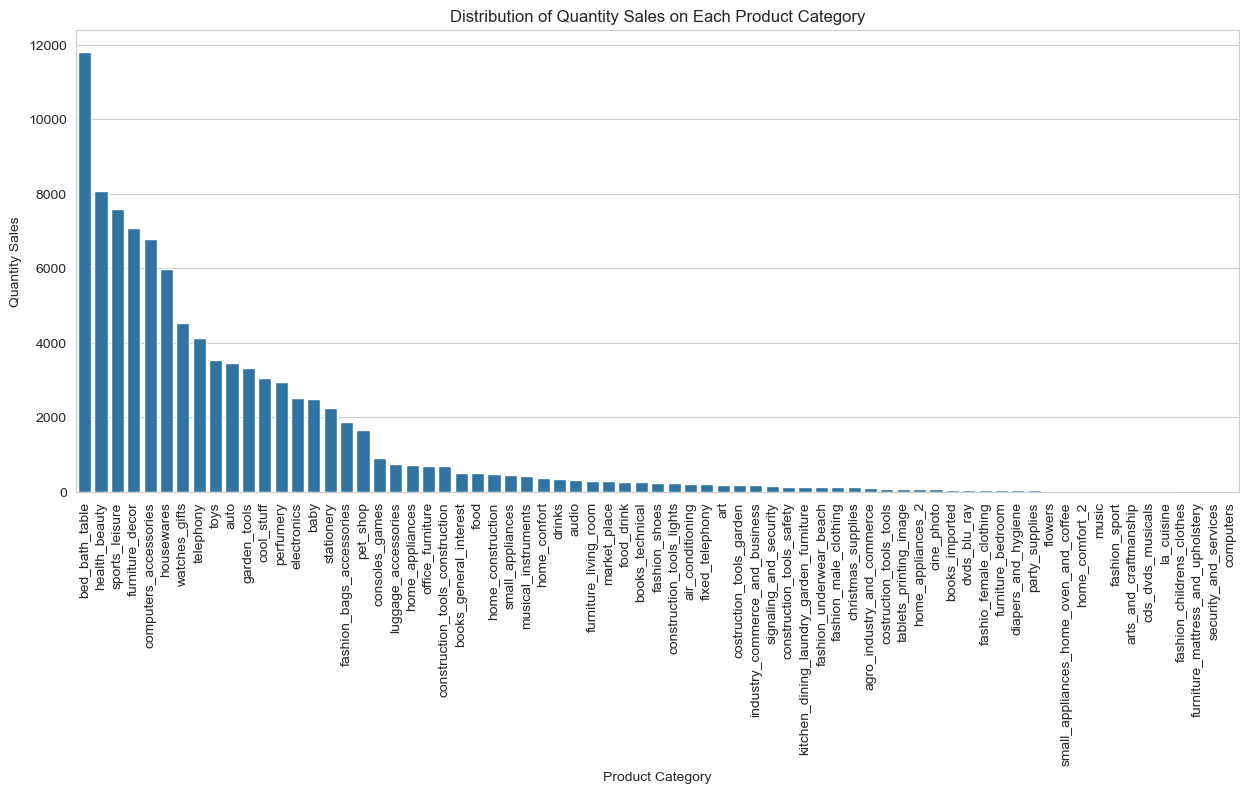

In [685]:
# Prepare the data for visualization
qty_each_category = (
    df_sales_cust.groupby("product_category_name_english")
    .agg({"qty": "sum"})
    .sort_values(by="qty", ascending=False)
)

# Visualize the distribution of quantity sales on each product category
fig28 = plt
fig28.figure(figsize=(15, 6))
fig28.title("Distribution of Quantity Sales on Each Product Category")
fig28.xlabel("Product Category")
fig28.xticks(rotation="vertical")
fig28.ylabel("Quantity Sales")
sns.barplot(
    x="product_category_name_english",
    y="qty",
    data=qty_each_category,
    estimator=np.mean,
    ci=None,
)
fig28.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'top10_prod_qty.png'), bbox_inches='tight')

print(qty_each_category.head(3))

__Insights:__ Top 3 categories
1. The product category of **bed_bath_table** sold **11810** items in total
2. The product category of **health_beauty** sold **8084** items in total
3. The product category of **sports_leisure** sold **7594** items in total

- 3. Which products have shortest shipping time on average?

In [688]:
# Check the product category with the fastest shipping time on average
df_sales_cust.groupby("product_category_name_english").agg(
    {"delivery_diff": "mean"}
).sort_values(by="delivery_diff", ascending=True)

delivery_diff
product_category_name_english               
security_and_services             -17.000000
la_cuisine                        -16.777778
furniture_bedroom                 -16.000000
cds_dvds_musicals                 -15.818182
fixed_telephony                   -15.494565
...                                      ...
food                               -9.768879
home_confort                       -9.732558
home_comfort_2                     -8.708333
arts_and_craftmanship              -6.227273
computers                          -2.000000

[71 rows x 1 columns]

__Insights:__ The fastes shipping time on average are accounted in the category of security and services, la cuisine and furniture bedroom.

- 4. What are the highest and lowest rated product categories?

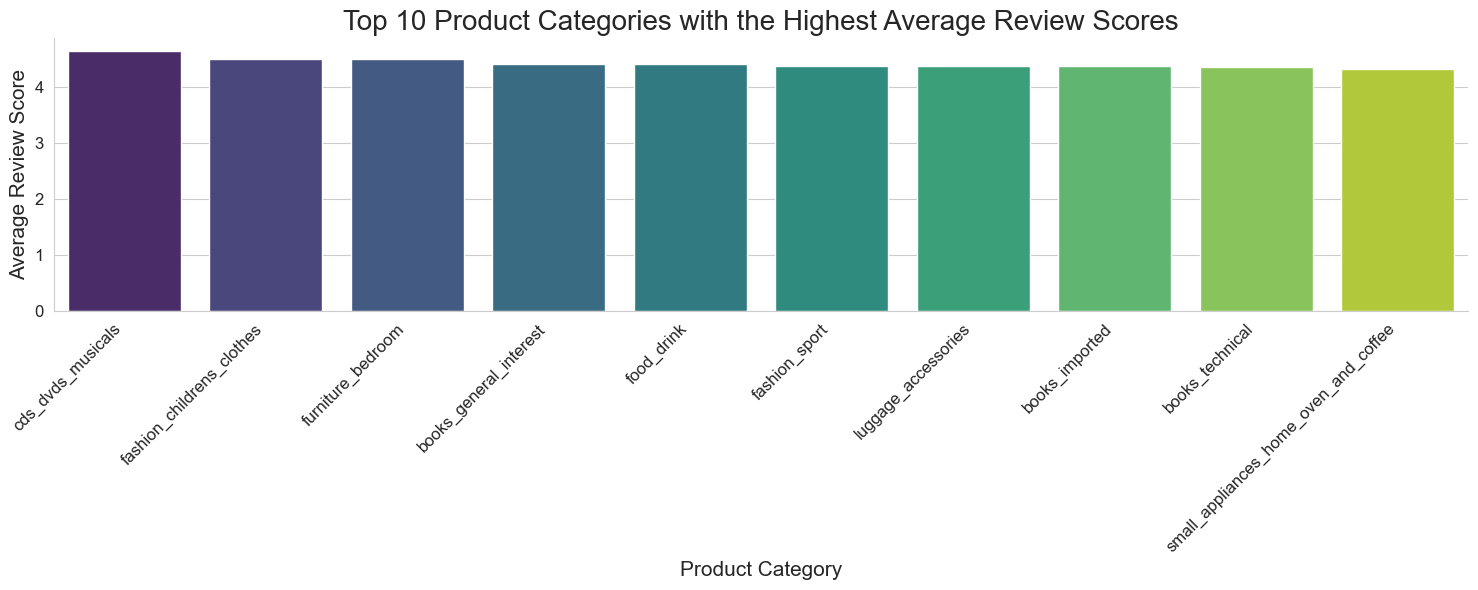

           product_category_name_english  review_score
0                      cds_dvds_musicals      4.636364
1              fashion_childrens_clothes      4.500000
2                      furniture_bedroom      4.500000
3                 books_general_interest      4.413088
4                             food_drink      4.405286
5                          fashion_sport      4.384615
6                    luggage_accessories      4.377747
7                         books_imported      4.368421
8                        books_technical      4.351562
9  small_appliances_home_oven_and_coffee      4.322581


In [691]:
# Get the top 10 product categories with the highest average review scores
top_10_categories = (
    df_sales_cust.groupby("product_category_name_english")["review_score"]
    .mean()
    .nlargest(10)
    .reset_index()
)

# Visualize the top 10 product categories with the highest average review scores

fig29 = plt
plt.figure(figsize=(15, 6))

sns.barplot(
    x="product_category_name_english",
    y="review_score",
    data=top_10_categories,
    palette="viridis",
    hue="product_category_name_english",
    legend=False
)

# Customize plot appearance
fig29.title(
    "Top 10 Product Categories with the Highest Average Review Scores",
    fontsize=20,
)
fig29.xlabel("Product Category", fontsize=15)
fig29.ylabel("Average Review Score", fontsize=15)
fig29.xticks(rotation=45, ha="right", fontsize=12)
fig29.yticks(fontsize=12)

# Clean up plot aesthetics
sns.despine()
fig29.tight_layout()

#Export the plot
fig29.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'high_score_cat.png'), bbox_inches='tight')

# Show plot
fig29.show()

#print average numbers
print(top_10_categories)

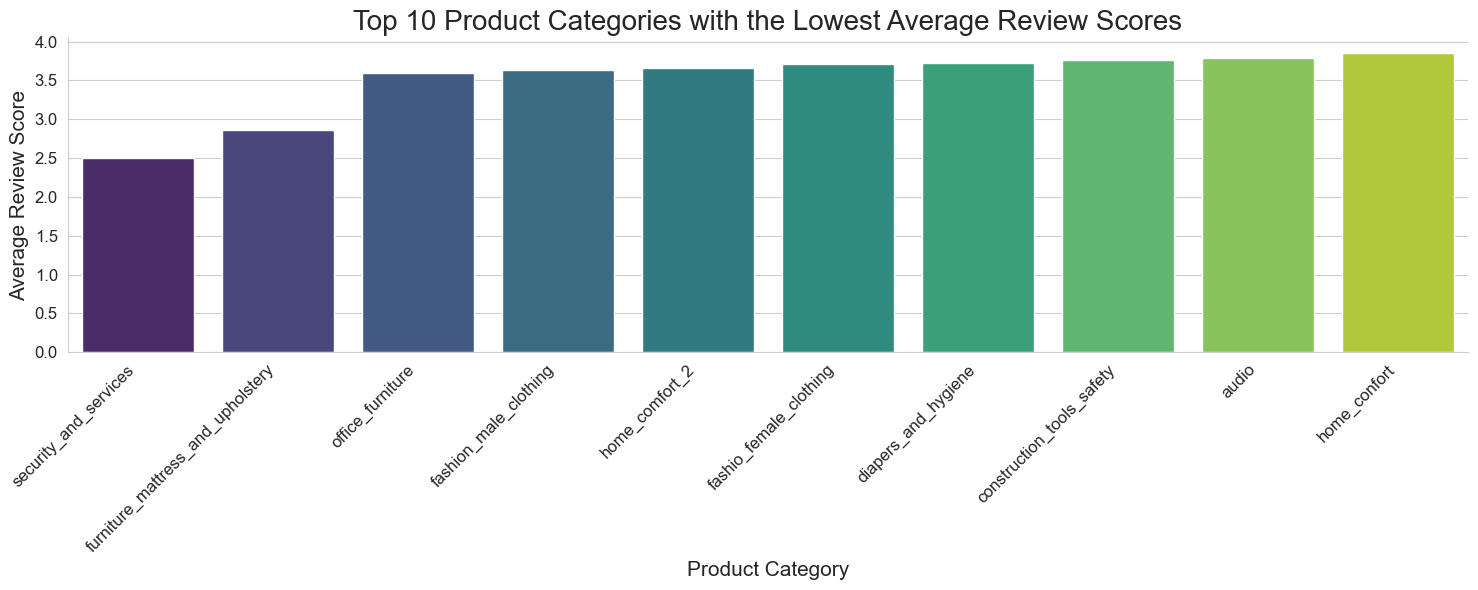

       product_category_name_english  review_score
0              security_and_services      2.500000
1  furniture_mattress_and_upholstery      2.857143
2                   office_furniture      3.594059
3              fashion_male_clothing      3.637931
4                     home_comfort_2      3.666667
5             fashio_female_clothing      3.714286
6                diapers_and_hygiene      3.730769
7          construction_tools_safety      3.769231
8                              audio      3.789116
9                       home_confort      3.848837


In [692]:
# Get the top 10 product categories with the lowest average review scores
top_10_categories_low = (
    df_sales_cust.groupby("product_category_name_english")["review_score"]
    .mean()
    .nsmallest(10)
    .reset_index()
)

# Visualize the top 10 product categories with the highest average review scores

fig30 = plt
plt.figure(figsize=(15, 6))

sns.barplot(
    x="product_category_name_english",
    y="review_score",
    data=top_10_categories_low,
    palette="viridis",
    hue="product_category_name_english",
    legend=False
)

# Customize plot appearance
fig30.title(
    "Top 10 Product Categories with the Lowest Average Review Scores",
    fontsize=20,
)
fig30.xlabel("Product Category", fontsize=15)
fig30.ylabel("Average Review Score", fontsize=15)
fig30.xticks(rotation=45, ha="right", fontsize=12)
fig30.yticks(fontsize=12)

# Clean up plot aesthetics
sns.despine()
fig30.tight_layout()

#Export the plot
fig30.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'low_score_cat.png'), bbox_inches='tight')

# Show plot
fig30.show()

#print average numbers
print(top_10_categories_low)

__Insights:__ The top 10 categories score on average a review above 4. Whereas the categories with the lowest score from 2 to closely 4. That means that all products (high & low) are receiving on average an **good - very good score**.

### 6.4 Time based analysis
- 1. Are there seasonal trends in sales volumne and revenue?

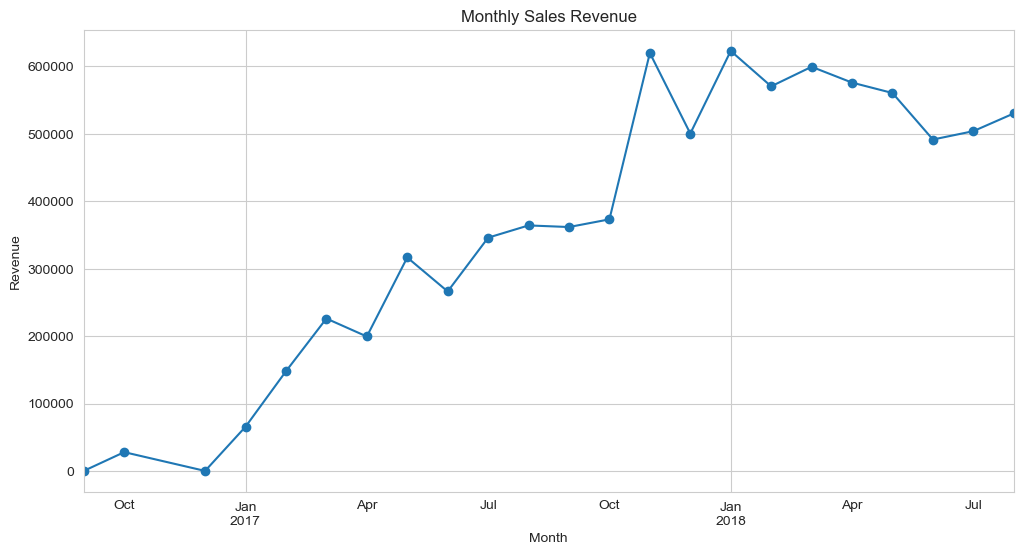

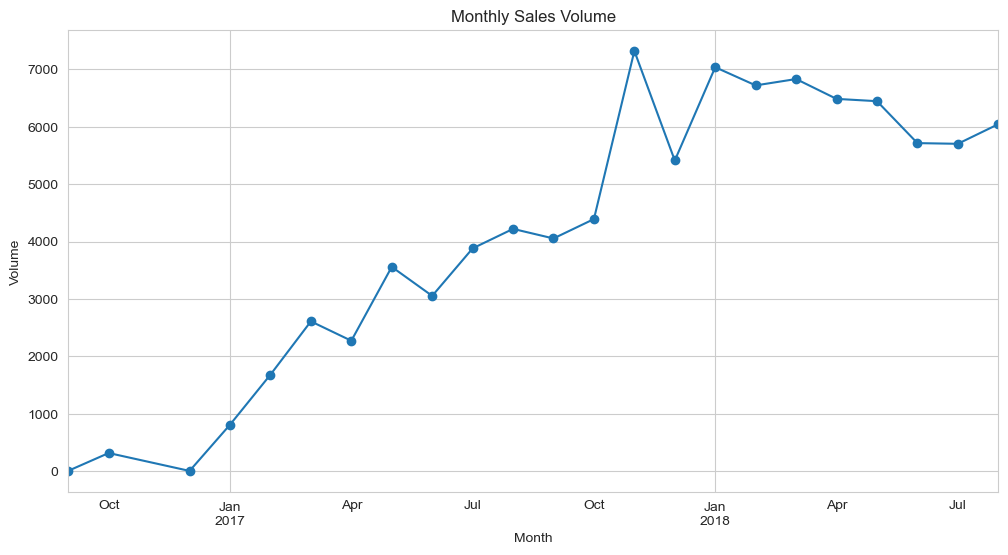

order_purchase_timestamp
2016-09        47.82
2016-10     27869.55
2016-12        19.62
2017-01     65524.99
2017-02    147793.39
2017-03    225994.54
2017-04    199366.58
2017-05    316566.55
2017-06    266184.74
2017-07    345934.36
2017-08    364089.23
2017-09    361700.61
2017-10    373107.44
2017-11    619784.40
2017-12    500365.57
2018-01    622872.83
2018-02    570370.95
2018-03    599342.20
2018-04    575879.81
2018-05    560466.87
2018-06    491471.87
2018-07    503866.84
2018-08    530156.36
Freq: M, Name: total_rev_order, dtype: float64
order_purchase_timestamp
2016-09       3
2016-10     313
2016-12       1
2017-01     807
2017-02    1679
2017-03    2608
2017-04    2270
2017-05    3558
2017-06    3052
2017-07    3880
2017-08    4220
2017-09    4053
2017-10    4391
2017-11    7322
2017-12    5412
2018-01    7038
2018-02    6721
2018-03    6832
2018-04    6486
2018-05    6446
2018-06    5715
2018-07    5703
2018-08    6045
Freq: M, Name: qty, dtype: int64


In [695]:
# Filtering the data for time range 2016-01-09 to 2018-08-31
filtered_data = df_sales_cust[
    (df_sales_cust["order_purchase_timestamp"] >= "2016-01-09")
    & (df_sales_cust["order_purchase_timestamp"] <= "2018-08-31")]


# Group the data by order purchase timestamp and sum up the total revenue per day
monthly_sales = filtered_data.groupby(filtered_data['order_purchase_timestamp'].dt.to_period('M'))['total_rev_order'].sum()
monthly_sales.plot(figsize=(12, 6), marker='o', title='Monthly Sales Revenue')

fig31 = plt
fig31.ylabel('Revenue')
fig31.xlabel('Month')
fig31.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'season_sales_rev.png'), bbox_inches='tight')

fig31.show()

# Group the data by order purchase timestamp and sum up the total order volume per day
monthly_sales_2 = filtered_data.groupby(filtered_data['order_purchase_timestamp'].dt.to_period('M'))['qty'].sum()
monthly_sales_2.plot(figsize=(12, 6), marker='o', title='Monthly Sales Volume')

fig32 = plt
fig32.ylabel('Volume')
fig32.xlabel('Month')
fig32.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Update', 'season_sales_vol.png'), bbox_inches='tight')

fig32.show()

print(monthly_sales)
print(monthly_sales_2)

__Insights:__ There is no clear seasonal pattern visible, beside that the sales drop around **June** and **July** and increase in **August**.

## Export the datasets

In [698]:
# Exporting the cleaned data for further analysis

df_sales_cust.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_sales_cust.pkl'))
df_sales_cust.to_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_sales_cust.csv'))

df_sales_sel.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_sales_sel.pkl'))
df_sales_sel.to_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_sales_sel.csv'))

df_time_series.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_time_series.pkl'))
df_time_series.to_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_time_series.csv'))

data_standardized.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'data_standardized.pkl'))
data_standardized.to_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'data_standardized.csv'))

df_sales_cust_sub.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_sales_cust_sub.pkl'))
df_sales_cust_sub.to_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'Update', 'df_sales_cust_sub.csv'))